In [1]:
import json
import os
import re
import pandas as pd
import matplotlib as mpl
import numpy as np
import logging
import glob
import shutil
from distutils.dir_util import copy_tree
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from scipy.signal import savgol_filter
import toml

import pickle
import os
import logging
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.spatial.transform import Rotation as R
from scipy.spatial.transform import Slerp
import seaborn as sns

pd.options.mode.chained_assignment = None

from ipynb.fs.full.V07_Utils  import *

In [2]:
######################################################################
# Load Configuration
######################################################################

config_path = 'C:/Users/Thomas Weikert/Documents/Thesis/Project_V07_24092021/Code/V07_config.toml'
cfg = toml.load(config_path)

######################################################################
# Data directories
######################################################################
# Result path  
Path_dataset01_data = cfg['Path_dataset01'] 
# Figure path 
Path_figures_dataset01_data = cfg['Path_figures_dataset01'] + "Traces/"

######################################################################
# GRU quat directories
######################################################################
# Result path  
Path_results_dataset01_GRU_quat = cfg['Path_results_dataset01'] + "GRU_quat/"
# Figure path 
Path_figures_dataset01_GRU_quat = cfg['Path_figures_dataset01'] + "GRU_quat/"

######################################################################
# GRU pos directories
######################################################################
# Result path  
Path_results_dataset01_GRU_pos = cfg['Path_results_dataset01'] + "GRU_pos/"
# Figure path 
Path_figures_dataset01_GRU_pos = cfg['Path_figures_dataset01'] + "GRU_pos/"

######################################################################
# DESP directories
######################################################################
# Result path  
Path_results_dataset01_DESP = cfg['Path_results_dataset01'] + "DESP/"
# Figure path 
Path_figures_dataset01_DESP = cfg['Path_figures_dataset01'] + "DESP/"


######################################################################
# Baseline quat directories
######################################################################
# Result path  
Path_results_dataset01_Baseline_quat = cfg['Path_results_dataset01'] + "Baseline_quat/"
# Figure path 
Path_figures_dataset01_Baseline_quat = cfg['Path_figures_dataset01'] + "Baseline_quat/"

######################################################################
# Baseline pos directories
######################################################################
# Result path  
Path_results_dataset01_Baseline_pos = cfg['Path_results_dataset01'] + "Baseline_pos/"
# Figure path 
Path_figures_dataset01_Baseline_pos = cfg['Path_figures_dataset01'] + "Baseline_pos/"



#######################################################################################################################

# Figure path   
Path_figures_dataset01 = cfg['Path_figures_dataset01']

# ##############################################################
# Methods
# ##############################################################

In [3]:
###################################################
# Traces Position
###################################################

def plot_position_traces_joint(dataset_path_result, figures_path): 
     

    list_datasets = get_csv_files(dataset_path_result, "*delta*full_cont*")
    
    for single_dataset in list_datasets:
        df = pd.read_csv(single_dataset)
        ts = np.arange(0, df.shape[0])
        
        trace_id = os.path.splitext(os.path.basename(single_dataset))[0]

        plt.figure(figsize=(18,8))
        
        
        ##################################################################
        # Plot x, y and z position in individual charts
        ##################################################################
        
        # Plot yaw true and yaw prediction in combined chart
        #plt.plot(ts, df.loc[:, 'x_true'], label='x_true')
        #plt.plot(ts, df.loc[:, 'x_pred']  , label='x_pred')
        #plt.legend(loc='upper left')
        #dest = os.path.join(figures_path, "{}_joint_x_delta.pdf".format(trace_id))
        #plt.savefig(dest)
        #plt.clf()
        
        # Plot pitch true and yaw prediction in combined chart
        #plt.plot(ts, df.loc[:, 'y_true'], label='y_true')
        #plt.plot(ts, df.loc[:, 'y_pred']  , label='y_pred')
        #plt.legend(loc='upper left')
        #dest = os.path.join(figures_path, "{}_joint_y_delta.pdf".format(trace_id))
        #plt.savefig(dest)
        #plt.clf()
        
        # Plot roll true and yaw prediction in combined chart
        #plt.plot(ts, df.loc[:, 'z_true'], label='z_true')
        #plt.plot(ts, df.loc[:, 'z_pred']  , label='z_pred')
        #plt.legend(loc='upper left')
        #dest = os.path.join(figures_path, "{}_joint_z_delta.pdf".format(trace_id))
        #plt.savefig(dest)
        #plt.clf()
        
        
        
        ##################################################################
        # Plot yaw, pitch and roll orientation in one chart
        ##################################################################
        
        plt.plot(ts, df.loc[:, 'x_true'], label='yaw-interpolated')
        plt.plot(ts, df.loc[:, 'y_true'], label='pitch-interpolated', linestyle='--')
        plt.plot(ts, df.loc[:, 'z_true'] , label='roll-interpolated', linestyle='-.')
        plt.legend(loc='upper left')
        
        plt.plot(ts, df.loc[:, 'x_pred']  , label='x_preds')
        plt.plot(ts, df.loc[:, 'y_pred'], label='y_preds', linestyle='--')
        plt.plot(ts,df.loc[:, 'z_pred'], label='z_preds', linestyle='-.')
        plt.legend(loc='upper left')
        
        #trace_id = os.path.splitext(os.path.basename(single_dataset))[0]
        #
        
        #plt.savefig(dest)
        #plt.clf()
        
        
        #print("Plotted all positions for trace {} and saving to file {}".format(single_dataset, dest))
    print("Done with traces")
        

In [4]:
def plot_quat_traces_joint(dataset_path, figures_path): 
     

    list_datasets = get_csv_files(dataset_path, "train*")
    
    for single_dataset in list_datasets:

        df = pd.read_csv(single_dataset)
        #df = df[2100:2200]
        ts = np.arange(0, df.shape[0])
        
        trace_id = os.path.splitext(os.path.basename(single_dataset))[0]

        plt.figure(figsize=(18,8))
        
        
        ##################################################################
        # Plot yaw, pitch and roll orientation in individual charts
        ##################################################################
        
        # Plot yaw true and yaw prediction in combined chart
        plt.plot(ts, df.loc[:, 'yaw_true'], label='yaw-interpolated')
        plt.plot(ts, df.loc[:, 'yaw_pred']  , label='yaw-preds')
        plt.legend(loc='upper left')
        dest = os.path.join(figures_path, "{}_joint_yaw.pdf".format(trace_id))
        plt.savefig(dest)
        plt.clf()
        
        # Plot pitch true and yaw prediction in combined chart
        plt.plot(ts, df.loc[:, 'pitch_true'], label='pitch-interpolated')
        plt.plot(ts, df.loc[:, 'pitch_pred']  , label='pitch-preds')
        plt.legend(loc='upper left')
        dest = os.path.join(figures_path, "{}_joint_pitch.pdf".format(trace_id))
        plt.savefig(dest)
        plt.clf()
        
        # Plot roll true and yaw prediction in combined chart
        plt.plot(ts, df.loc[:, 'roll_true'], label='roll-interpolated')
        plt.plot(ts, df.loc[:, 'roll_pred']  , label='roll-preds')
        plt.legend(loc='upper left')
        dest = os.path.join(figures_path, "{}_joint_roll.pdf".format(trace_id))
        plt.savefig(dest)
        plt.clf()
        
        
        
        ##################################################################
        # Plot yaw, pitch and roll orientation in one chart
        ##################################################################
        
        #plt.plot(ts, df.loc[:, 'yaw_true'], label='yaw-interpolated')
        #plt.plot(ts, df.loc[:, 'pitch_true'], label='pitch-interpolated', linestyle='--')
        #plt.plot(ts, df.loc[:, 'roll_true'] , label='roll-interpolated', linestyle='-.')
        #plt.legend(loc='upper left')
        
        #plt.plot(ts, df.loc[:, 'yaw_pred']  , label='yaw-preds')
        #plt.plot(ts, df.loc[:, 'pitch_pred'], label='pitch-preds', linestyle='--')
        #plt.plot(ts,np.abs(df.loc[:, 'roll_pred'] - df.loc[:, 'roll_true']), label='roll_preds-roll_true', linestyle='-.')
        #plt.plot(ts,df.loc[:, 'roll_pred'], label='roll_preds', linestyle='-.')
        #plt.legend(loc='upper left')
        
        #trace_id = os.path.splitext(os.path.basename(single_dataset))[0]
        #
        
        #plt.savefig(dest)
        #plt.clf()
        
        
        #print("Plotted all orientation for trace {} and saving to file {}".format(single_dataset, dest))
    print("Done with traces")
        

In [5]:
###################################################
# Error
###################################################

def plot_error(dataset_path, figures_path): 
     

    list_datasets = get_csv_files(dataset_path, "delta")
    
    for single_dataset in list_datasets:
        df = pd.read_csv(single_dataset)
        ts = np.arange(0, df.shape[0])
              
        
        plt.figure(figsize=(18,8))
        trace_id = os.path.splitext(os.path.basename(single_dataset))[0]
        
        #print(single_dataset)
                
        # Plot yaw error 
        plt.plot(ts, df.loc[:] , label='error', linestyle='-.')
        plt.legend(loc='upper left')
        dest = os.path.join(figures_path, "{}_error.pdf".format(trace_id))
        plt.savefig(dest)
        plt.clf()
                
        #print("Plotted all orientation errors for trace {} and saving to file {}".format(single_dataset, dest))
    print("Done with errors")
        

In [6]:
###################################################
# Boxplot Position
###################################################

def plot_boxplot_euc(dataset_path, figures_path): 
     

    list_datasets = get_csv_files(dataset_path, "delta*dists")
    
    for single_dataset in list_datasets:
        print(single_dataset)
        df = pd.read_csv(single_dataset)
        trace_id = os.path.splitext(os.path.basename(single_dataset))[0]
        
        plt.figure(figsize=(18,8))
        
        sns.set_style('whitegrid')
        sns.boxplot(y='euc_dists', whis=[1, 99] , data=df)
        #sns.violinplot(y='ang_dists', whis=[0.05, 0.95] , data=df)
        #sns.stripplot(y='ang_dists' , data=df)
        
        dest = os.path.join(figures_path, "{}_boxplot.pdf".format(trace_id))
        plt.savefig(dest)
        plt.clf()
        
        sns.distplot(df['euc_dists'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1});
        dest = os.path.join(figures_path, "{}_density.pdf".format(trace_id))
        plt.savefig(dest)
        plt.clf()   
        
        
    print("Done with boxplots")

In [7]:
###################################################
# Boxplot Quaternion
###################################################

def plot_boxplot_quat(dataset_path, figures_path): 
     

    list_datasets = get_csv_files(dataset_path, "dists")
    
    for single_dataset in list_datasets:
        print(single_dataset)
        df = pd.read_csv(single_dataset)
        trace_id = os.path.splitext(os.path.basename(single_dataset))[0]
        
        plt.figure(figsize=(18,8))
        
        sns.set_style('whitegrid')
        sns.boxplot(y='euc_dists', whis=[1, 99] , data=df)
        #sns.violinplot(y='ang_dists', whis=[0.05, 0.95] , data=df)
        #sns.stripplot(y='ang_dists' , data=df)
        
        dest = os.path.join(figures_path, "{}_boxplot.pdf".format(trace_id))
        plt.savefig(dest)
        plt.clf()
        
        sns.distplot(df['ang_dists'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1});
        dest = os.path.join(figures_path, "{}_density.pdf".format(trace_id))
        plt.savefig(dest)
        plt.clf()   
        
        
    print("Done with boxplots")

In [8]:
def plot_traces_and_prediction(pos_path, quat_path, figures_path):
    
    for csv_pos, csv_rot in zip(get_csv_files(pos_path, ""),get_csv_files(quat_path, "")):
        print(csv_pos)
        print(csv_rot)
        
        #ts = np.arange(0, 60 + cfg['dt'], cfg['dt'])
        df = pd.read_csv(csv_pos)
        #ts = len(df)
        ts = np.arange(0, df.shape[0])
        df.columns = cfg['pos_coords_pred']  + cfg['pos_coords_true']
        #print(df)
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 8), sharex=True)

        # Plot position
        ax1.plot(ts, df['x_true'], label='x')
        ax1.plot(ts, df['y_true'], label='y', linestyle='--')
        ax1.plot(ts, df['z_true'], label='z', linestyle='-.')
        ax1.set_ylabel('meters')
        #ax1.set_xlim(0, 60)
        #ax1.legend(loc='upper left')
        #ax1.yaxis.grid(which='major', linestyle='dotted', linewidth=1)
        #ax1.xaxis.set_major_locator(MultipleLocator(10))
        

        df = pd.read_csv(csv_rot)
        df.columns = cfg['pos_coords']  + cfg['quat_coords_true']
        ts = np.arange(0, df.shape[0])

        # Plot orientation
        ax2.plot(ts, df['qw_true'], label='qw')
        ax2.plot(ts, df['qx_true'], label='qx', linestyle='--')
        ax2.plot(ts, df['qy_true'], label='qy', linestyle='-.')
        ax2.plot(ts, df['qz_true'], label='qz', linestyle='--')
        ax2.set_xlabel('seconds')
        ax2.set_ylabel('quaternion')
        #ax2.set_xlim(0, 60)
        ax2.legend(loc='upper left')
        ax2.yaxis.grid(which='major', linestyle='dotted', linewidth=1)
        ax2.xaxis.set_major_locator(MultipleLocator(10))

        #trace_id = os.path.splitext(os.path.basename(trace_path))[0]
        #dest = os.path.join(figures_path, "Fig5-trace{}.pdf".format(trace_id))
        #fig.savefig(dest)
        #logging.info("Plotting trace {} and saving to file {}".format(trace_path, dest))
        
       

# Plots for thesis

In [9]:
#######################################################
# Prints rot and quat for each trace
#######################################################


def plot_traces(path, figures_path):
    
    for csv in get_csv_files(path, "full_cont"):
        print(csv)
        
        #ts = np.arange(0, 60 + cfg['dt'], cfg['dt'])
        df = pd.read_csv(csv)
        df = df[8000:11000]
        #ts = len(df)
        ts = np.arange(0, df.shape[0])
        df.columns = cfg['pos_coords']  + cfg['quat_coords']
        #print(df)
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 8), sharex=True)

        # Plot position
        ax1.plot(ts, df['x'], label='x')
        ax1.plot(ts, df['y'], label='y', linestyle='--')
        ax1.plot(ts, df['z'], label='z', linestyle='-.')
        ax1.set_ylabel('meters')
        #ax1.set_xlim(0, 60)
        ax1.legend(loc='upper left')
        #ax1.yaxis.grid(which='major', linestyle='dotted', linewidth=1)
        #ax1.xaxis.set_major_locator(MultipleLocator(10))

        # Plot orientation
        ax2.plot(ts, df['qw'], label='qw')
        ax2.plot(ts, df['qx'], label='qx', linestyle='--')
        ax2.plot(ts, df['qy'], label='qy', linestyle='-.')
        ax2.plot(ts, df['qz'], label='qz', linestyle='--')
        ax2.set_xlabel('frames')
        ax2.set_ylabel('quaternion')
        #ax2.set_xlim(0, 60)
        ax2.legend(loc='upper left')
        #ax2.yaxis.grid(which='major', linestyle='dotted', linewidth=1)
        #ax2.xaxis.set_major_locator(MultipleLocator(10))

        trace_id = os.path.splitext(os.path.basename(csv))[0]
        dest = os.path.join(figures_path, "Trace_window_{}.pdf".format(trace_id))
        fig.savefig(dest)
        logging.info("Plotting trace {} and saving to file {}".format(csv, dest))
        fig.clf()
        
        

In [10]:
########################################
# Plot Continious Traces  
########################################

plot_traces(Path_dataset01_data, Path_figures_dataset01_data)

C:/Users/Thomas Weikert/Documents/Thesis/Project_V07_24092021/Data/01_Dataset\1_full_continious.csv
C:/Users/Thomas Weikert/Documents/Thesis/Project_V07_24092021/Data/01_Dataset\2_full_continious.csv
C:/Users/Thomas Weikert/Documents/Thesis/Project_V07_24092021/Data/01_Dataset\3_full_continious.csv
C:/Users/Thomas Weikert/Documents/Thesis/Project_V07_24092021/Data/01_Dataset\4_full_continious.csv
C:/Users/Thomas Weikert/Documents/Thesis/Project_V07_24092021/Data/01_Dataset\5_full_continious.csv


<Figure size 1296x576 with 0 Axes>

<Figure size 1296x576 with 0 Axes>

<Figure size 1296x576 with 0 Axes>

<Figure size 1296x576 with 0 Axes>

<Figure size 1296x576 with 0 Axes>

In [26]:
#######################################################
# Prints original and continious traces 
#######################################################


def plot_traces(path, figures_path):
    
    
    ########### Original Trace
    for csv in get_csv_files(path, "5_full_original"):
        print(csv)
        #ts = np.arange(0, 60 + cfg['dt'], cfg['dt'])
        df_org = pd.read_csv(csv)
        #df_org = df_org[8000:11000]
        df_org.columns = ["2","3","4","5","6","7","8","x","y","z","qx","qy","qz","qw","16","17","18"]
        #ts = len(df)
        ts = np.arange(0, df_org.shape[0])
        
        #print(df)
        

    ########### Continious Trace
    #for csv in get_csv_files(path, "5_full_cont"):
    #    print(csv)
    #    #ts = np.arange(0, 60 + cfg['dt'], cfg['dt'])
    #    df = pd.read_csv(csv)
    #    df = df[8000:11000]
    #    #ts = len(df)
    #   ts = np.arange(0, df.shape[0])
    #    df.columns = cfg['pos_coords']  + cfg['quat_coords']
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 8), sharex=True)
    # Plot orignal
    ax1.plot(ts, df_org['qw'], label='qw')
    ax1.plot(ts, df_org['qx'], label='qx', linestyle='--')
    ax1.plot(ts, df_org['qy'], label='qy', linestyle='-.')
    ax1.plot(ts, df_org['qz'], label='qz', linestyle='--')
    ax1.set_ylabel('Rotation')
    #ax1.set_xlim(0, 60)
    ax1.legend(loc='upper left')
    #ax1.yaxis.grid(which='major', linestyle='dotted', linewidth=1)
    #ax1.xaxis.set_major_locator(MultipleLocator(10))

    # Plot continious
    ax2.plot(ts, df_org['x'], label='x')
    ax2.plot(ts, df_org['y'], label='y', linestyle='--')
    ax2.plot(ts, df_org['z'], label='z', linestyle='-.')
    #ax2.plot(ts, df_org['qz'], label='qz', linestyle='--')
    ax2.set_xlabel('frames')
    ax2.set_ylabel('Position')
    #ax2.set_xlim(0, 60)
    ax2.legend(loc='upper left')
    #ax2.yaxis.grid(which='major', linestyle='dotted', linewidth=1)
    #ax2.xaxis.set_major_locator(MultipleLocator(10))

    trace_id = os.path.splitext(os.path.basename(csv))[0]
    dest = os.path.join(figures_path, "Continious_transformation_{}.pdf".format(trace_id))
    fig.savefig(dest)
    logging.info("Plotting trace {} and saving to file {}".format(csv, dest))
    fig.clf()


In [27]:
########################################
# Plot Original and Continious Traces  
########################################

plot_traces(Path_dataset01_data, Path_figures_dataset01_data)

C:/Users/Thomas Weikert/Documents/Thesis/Project_V07_24092021/Data/01_Dataset\5_full_original.csv


<Figure size 1296x576 with 0 Axes>

In [378]:
#######################################################
# Prints boxplots for each trace 
#######################################################

def plot_boxplot_per_trace(pos_path, rot_path, figures_path):
        all_euc_dists = []
        all_ang_dists = []
        
            
        for csv_pos in get_csv_files(pos_path, "con*pos*dists"):
            print(csv_pos)        
            df = pd.read_csv(csv_pos)
            df.columns = ['euc_dists']
            euc_dist = df.to_numpy()
            all_euc_dists.append(euc_dist)
        
        print(rot_path)
        for csv_rot in get_csv_files(rot_path, "delta*quat*dists"):
            print(csv_rot)        
            df = pd.read_csv(csv_rot)
            #df.columns = ['ang_dists','euc_dists']
            df.columns = ['ang_dists']
            ang_dist = df['ang_dists'].to_numpy()
            all_ang_dists.append(ang_dist)
        
        all_euc_dists = np.array(all_euc_dists).flatten()
        all_ang_dists = np.array(all_ang_dists).flatten()
        
        # Figure 8
        fig, ax = plt.subplots(2, 1, figsize=(18, 18), sharex=True, sharey=True)
        ax = ax.flatten()
        #for a in ax:
        #    plt.setp(a.spines.values(), linewidth=1)
        #    a.xaxis.grid(which='major', linestyle='dotted', linewidth=1)
        #    a.yaxis.grid(which='major', linestyle='dotted', linewidth=1)
        #    #a.set_yscale('log')
            
        ax[0].set_ylabel('Euclidean Distiance')
        #ax[0].set_ylim(0.00005, 0.016)
        #ax[1].set_ylim(0, 0.03)
        ax[1].set_xlabel('Trace')
        ax[1].set_ylabel('Geodesic Distance')
        flierprops = dict(marker='o', markersize=3, markeredgecolor='#686868', linewidth=0.1) 
        
        bp = ax[0].boxplot(all_euc_dists, whis=(1,95), showfliers=False)
        bp = ax[1].boxplot(all_ang_dists, whis=(1,95), showfliers=False)
        plt.setp(bp['caps'], color='black')
        plt.tight_layout()
        
        dest = os.path.join(figures_path, 'Boxplots_Position.pdf')
        fig.savefig(dest, facecolor='white')
        logging.info("Saving rotation boxplots to {}".format(dest))
        #print(len(all_euc_dists))

        

In [40]:
#######################################################
# Prints boxplots for position
#######################################################

def boxplot_position(base_path, desp_path, gru_path, figures_path):
        
        
        labels = ('Base','DESP', 'GRU')
        
        ##########################################
        # Dataset 1 
        ##########################################
        
        for csv_pos in get_csv_files(base_path, "1*dists"):
            print(csv_pos)
            pos_base_1 = pd.read_csv(csv_pos)
            pos_base_1.columns = ['euc_dists']
            pos_base_1 = pos_base_1['euc_dists']

            
        for csv_pos in get_csv_files(desp_path, "1*pos*dists"):
            print(csv_pos)
            pos_desp_1 = pd.read_csv(csv_pos)
            pos_desp_1.columns = ['euc_dists']
            pos_desp_1 = pos_desp_1['euc_dists']
         
        for csv_pos in get_csv_files(gru_path, "1*delta*dists"):
            print(csv_pos)
            pos_gru_1 = pd.read_csv(csv_pos)
            pos_gru_1.columns = ['euc_dists']
            pos_gru_1 = pos_gru_1['euc_dists']
            
               
        print('-----------------------------------------------------------')
        
        ##########################################
        # Dataset 2
        ##########################################
        
        for csv_pos in get_csv_files(base_path, "2*dists"):
            print(csv_pos)
            pos_base_2 = pd.read_csv(csv_pos)
            pos_base_2.columns = ['euc_dists']
            pos_base_2 = pos_base_2['euc_dists']

            
        for csv_pos in get_csv_files(desp_path, "2*pos*dists"):
            print(csv_pos)
            pos_desp_2 = pd.read_csv(csv_pos)
            pos_desp_2.columns = ['euc_dists']
            pos_desp_2 = pos_desp_2['euc_dists']
         
        for csv_pos in get_csv_files(gru_path, "2*delta*dists"):
            print(csv_pos)
            pos_gru_2 = pd.read_csv(csv_pos)
            pos_gru_2.columns = ['euc_dists']
            pos_gru_2 = pos_gru_2['euc_dists']
            
               
        print('-----------------------------------------------------------')
        
        
        ##########################################
        # Dataset 3
        ##########################################
        
        for csv_pos in get_csv_files(base_path, "3*dists"):
            pos_base_3 = pd.read_csv(csv_pos)
            pos_base_3.columns = ['euc_dists']
            
        for csv_pos in get_csv_files(desp_path, "3*pos*dists"):
            print(csv_pos)  
            pos_desp_3 = pd.read_csv(csv_pos)
            pos_desp_3.columns = ['ang_dists']
        
        for csv_rot in get_csv_files(gru_path, "3*delta*dists"):
            print(csv_rot)        
            pos_gru_3 = pd.read_csv(csv_rot)
            pos_gru_3.columns = ['euc_dists']
            pos_gru_3 = pos_gru_3['euc_dists']
            
        print('-----------------------------------------------------------')
            
        ##########################################
        # Dataset 4 
        ##########################################
          
        for csv_pos in get_csv_files(base_path, "4*dists"):
            pos_base_4 = pd.read_csv(csv_pos)
            pos_base_4.columns = ['euc_dists']
           
            
        for csv_pos in get_csv_files(desp_path, "4*pos*dists"):
            print(csv_pos)  
            pos_desp_4 = pd.read_csv(csv_pos)
            pos_desp_4.columns = ['ang_dists']
        
        for csv_rot in get_csv_files(gru_path, "4*delta*dists"):
            print(csv_rot)        
            pos_gru_4 = pd.read_csv(csv_rot)
            pos_gru_4.columns = ['euc_dists']
            pos_gru_4 = pos_gru_4['euc_dists']
            
        print('-----------------------------------------------------------')
        
        ##########################################
        # Dataset 5 
        ##########################################
           
        for csv_pos in get_csv_files(base_path, "5*dists"):
            pos_base_5 = pd.read_csv(csv_pos)
            pos_base_5.columns = ['euc_dists']
           
            
        for csv_pos in get_csv_files(desp_path, "5*pos*dists"):
            print(csv_pos)  
            pos_desp_5 = pd.read_csv(csv_pos)
            pos_desp_5.columns = ['ang_dists']
        
        for csv_rot in get_csv_files(gru_path, "5*delta*ists"):
            print(csv_rot)        
            pos_gru_5 = pd.read_csv(csv_rot)
            pos_gru_5.columns = ['euc_dists']
            pos_gru_5 = pos_gru_5['euc_dists']
            
        print('-----------------------------------------------------------')
                    
         
        # Boxplot Rotations
        fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(18, 6), sharey=True)
        
        axs[0].boxplot([pos_base_1, pos_desp_1,pos_gru_1], labels = labels, whis=(1,95), showfliers=True)
        axs[0].set_title('Dataset 1')
        axs[0].set_ylabel('Euclidean Distance in m')
       
        axs[1].boxplot([pos_base_2, pos_desp_2,pos_gru_2], labels = labels, whis=(1,95), showfliers=True)
        axs[1].set_title('Dataset 2')
        
        axs[2].boxplot([pos_base_3, pos_desp_3,pos_gru_3], labels = labels, whis=(1,95), showfliers=True)
        axs[2].set_title('Dataset 3')
        
        axs[3].boxplot([pos_base_4, pos_desp_4,pos_gru_4], labels = labels, whis=(1,95), showfliers=True)
        axs[3].set_title('Dataset 4')
        
        axs[4].boxplot([pos_base_5, pos_desp_5,pos_gru_5], labels = labels, whis=(1,95), showfliers=True)
        axs[4].set_title('Dataset 5')
        
        for ax in axs.flat:
            ax.yaxis.grid(which='major', linestyle='dotted', linewidth=1)
            
        dest = os.path.join(figures_path, 'Boxplots_Position.pdf')
        fig.savefig(dest, facecolor='white')
        logging.info("Saving rotation boxplots to {}".format(dest))
        #print(len(all_euc_dists))

C:/Users/Thomas Weikert/Documents/Thesis/Project_V07_24092021/Results/01_Dataset/Baseline_pos//Evaluation\1_full_continious_result_pos_dists.csv
C:/Users/Thomas Weikert/Documents/Thesis/Project_V07_24092021/Results/01_Dataset/DESP/8_2209_v01/Evaluation\1_full_continious_pos_dists.csv
C:/Users/Thomas Weikert/Documents/Thesis/Project_V07_24092021/Results/01_Dataset/GRU_pos/7_2409_v01/Evaluation\1_full_continious_result_delta_pos_dists.csv
-----------------------------------------------------------
C:/Users/Thomas Weikert/Documents/Thesis/Project_V07_24092021/Results/01_Dataset/Baseline_pos//Evaluation\2_full_continious_result_pos_dists.csv
C:/Users/Thomas Weikert/Documents/Thesis/Project_V07_24092021/Results/01_Dataset/DESP/8_2209_v01/Evaluation\2_full_continious_pos_dists.csv
C:/Users/Thomas Weikert/Documents/Thesis/Project_V07_24092021/Results/01_Dataset/GRU_pos/7_2409_v01/Evaluation\2_full_continious_result_delta_pos_dists.csv
----------------------------------------------------------

PermissionError: [Errno 13] Permission denied: 'C:/Users/Thomas Weikert/Documents/Thesis/Project_V07_24092021/Figures/01_Dataset/Boxplots_Position.pdf'

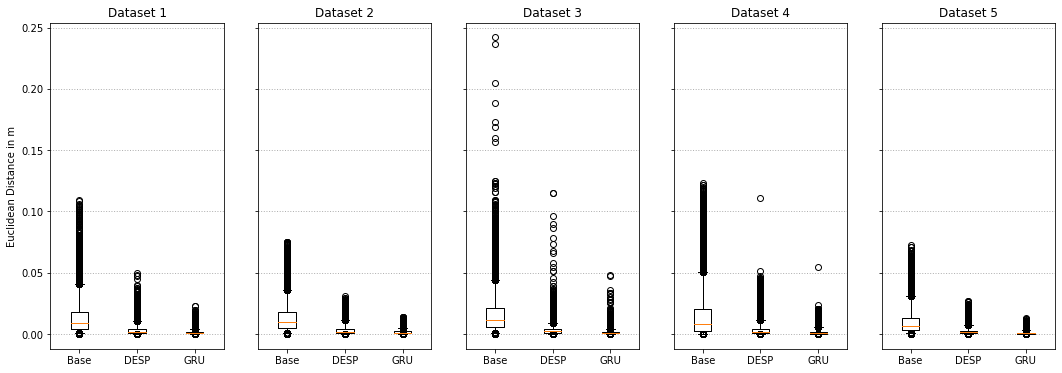

In [41]:
########################################
# Plot Boxplots for Rotation
########################################

boxplot_position(Path_results_dataset01_Baseline_pos + "/Evaluation", Path_results_dataset01_DESP + "8_2209_v01/Evaluation", Path_results_dataset01_GRU_pos + "7_2409_v01/Evaluation", Path_figures_dataset01)

In [12]:
#######################################################
# Prints boxplots for rotation
#######################################################

def boxplot_rotation(base_path, desp_path, gru_path, figures_path):
        
        
        labels = ('Base','DESP','GRU')
        
        ##########################################
        # Dataset 1 
        ##########################################
        
        for csv_pos in get_csv_files(base_path, "1*con*dists"):
            rot_base_1 = pd.read_csv(csv_pos)
            rot_base_1.columns = ['ang_dists','euc_dists']
            rot_base_1 = rot_base_1['ang_dists']
           
        for csv_pos in get_csv_files(desp_path, "1*con*quat*dists"):
            rot_desp_1 = pd.read_csv(csv_pos)
            rot_desp_1.columns = ['ang_dists']
        
        for csv_rot in get_csv_files(gru_path, "1*dists"):
            rot_gru_1 = pd.read_csv(csv_rot)
            rot_gru_1.columns = ['ang_dists','euc_dists']
            rot_gru_1 = rot_gru_1['ang_dists']
            
        ##########################################
        # Dataset 2
        ##########################################
           
        for csv_pos in get_csv_files(base_path, "2*con*dists"):
            rot_base_2 = pd.read_csv(csv_pos)
            rot_base_2.columns = ['ang_dists','euc_dists']
            rot_base_2 = rot_base_2['ang_dists']
            
        for csv_pos in get_csv_files(desp_path, "2*con*quat*dists"):
            print(csv_pos)  
            rot_desp_2 = pd.read_csv(csv_pos)
            rot_desp_2.columns = ['ang_dists']
        
        for csv_rot in get_csv_files(gru_path, "2*dists"):
            print(csv_rot)        
            rot_gru_2 = pd.read_csv(csv_rot)
            rot_gru_2.columns = ['ang_dists','euc_dists']
            rot_gru_2 = rot_gru_2['ang_dists']
            
        ##########################################
        # Dataset 3
        ##########################################
           
        for csv_pos in get_csv_files(base_path, "3*con*dists"):
            rot_base_3 = pd.read_csv(csv_pos)
            rot_base_3.columns = ['ang_dists','euc_dists']
            rot_base_3 = rot_base_3['ang_dists']
            
        for csv_pos in get_csv_files(desp_path, "3*con*quat*dists"):
            print(csv_pos)  
            rot_desp_3 = pd.read_csv(csv_pos)
            rot_desp_3.columns = ['ang_dists']
        
        for csv_rot in get_csv_files(gru_path, "3*dists"):
            print(csv_rot)        
            rot_gru_3 = pd.read_csv(csv_rot)
            rot_gru_3.columns = ['ang_dists','euc_dists']
            rot_gru_3 = rot_gru_3['ang_dists']
            
        ##########################################
        # Dataset 4 
        ##########################################
           
        for csv_pos in get_csv_files(base_path, "4*con*dists"):
            rot_base_4 = pd.read_csv(csv_pos)
            rot_base_4.columns = ['ang_dists','euc_dists']
            rot_base_4 = rot_base_4['ang_dists']
            
        for csv_pos in get_csv_files(desp_path, "4*con*quat*dists"):
            print(csv_pos)  
            rot_desp_4 = pd.read_csv(csv_pos)
            rot_desp_4.columns = ['ang_dists']
        
        for csv_rot in get_csv_files(gru_path, "4*dists"):
            print(csv_rot)        
            rot_gru_4 = pd.read_csv(csv_rot)
            rot_gru_4.columns = ['ang_dists','euc_dists']
            rot_gru_4 = rot_gru_4['ang_dists']
        
        ##########################################
        # Dataset 5 
        ##########################################
          
        for csv_pos in get_csv_files(base_path, "5*con*dists"):
            rot_base_5 = pd.read_csv(csv_pos)
            rot_base_5.columns = ['ang_dists','euc_dists']
            rot_base_5 = rot_base_5['ang_dists']
            
        for csv_pos in get_csv_files(desp_path, "5*con*quat*dists"):
            print(csv_pos)  
            rot_desp_5 = pd.read_csv(csv_pos)
            rot_desp_5.columns = ['ang_dists']
        
        for csv_rot in get_csv_files(gru_path, "5*dists"):
            print(csv_rot)        
            rot_gru_5 = pd.read_csv(csv_rot)
            rot_gru_5.columns = ['ang_dists','euc_dists']
            rot_gru_5 = rot_gru_5['ang_dists']
            
                    
         
        # Boxplot Rotations
        fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(18, 6), sharey=True)
        
        axs[0].boxplot([rot_base_1, rot_desp_1, rot_gru_1], labels = labels,whis=(1,95),  showfliers=False)
        axs[0].set_title('Dataset 1')
        axs[0].set_ylabel('Geodesic Distance in rad')
       
        axs[1].boxplot([rot_base_2, rot_desp_2, rot_gru_2], labels = labels,whis=(1,95),  showfliers=False)
        axs[1].set_title('Dataset 2')
        
        axs[2].boxplot([rot_base_3, rot_desp_3, rot_gru_3], labels = labels,whis=(1,95), showfliers=False)
        axs[2].set_title('Dataset 3')
        
        axs[3].boxplot([rot_base_4, rot_desp_4, rot_gru_4], labels = labels,whis=(1,95), showfliers=False)
        axs[3].set_title('Dataset 4')
        
        axs[4].boxplot([rot_base_5, rot_desp_5, rot_gru_5], labels = labels,whis=(1,95), showfliers=False)
        axs[4].set_title('Dataset 5')
        
    
        
        for ax in axs.flat:
            ax.yaxis.grid(which='major', linestyle='dotted', linewidth=1)
            
        dest = os.path.join(figures_path, 'Boxplots_Rotation.pdf')
        fig.savefig(dest, facecolor='white')
        logging.info("Saving rotation boxplots to {}".format(dest))
        #print(len(all_euc_dists))

C:/Users/Thomas Weikert/Documents/Thesis/Project_V07_24092021/Results/01_Dataset/DESP/8_2209_v01/Evaluation\2_full_continious_delta_quat_dists.csv
C:/Users/Thomas Weikert/Documents/Thesis/Project_V07_24092021/Results/01_Dataset/GRU_quat/7_2409_v01/Evaluation\2_full_continious_result_rot_dists.csv
C:/Users/Thomas Weikert/Documents/Thesis/Project_V07_24092021/Results/01_Dataset/DESP/8_2209_v01/Evaluation\3_full_continious_delta_quat_dists.csv
C:/Users/Thomas Weikert/Documents/Thesis/Project_V07_24092021/Results/01_Dataset/GRU_quat/7_2409_v01/Evaluation\3_full_continious_result_rot_dists.csv
C:/Users/Thomas Weikert/Documents/Thesis/Project_V07_24092021/Results/01_Dataset/DESP/8_2209_v01/Evaluation\4_full_continious_delta_quat_dists.csv
C:/Users/Thomas Weikert/Documents/Thesis/Project_V07_24092021/Results/01_Dataset/GRU_quat/7_2409_v01/Evaluation\4_full_continious_result_rot_dists.csv
C:/Users/Thomas Weikert/Documents/Thesis/Project_V07_24092021/Results/01_Dataset/DESP/8_2209_v01/Evaluatio

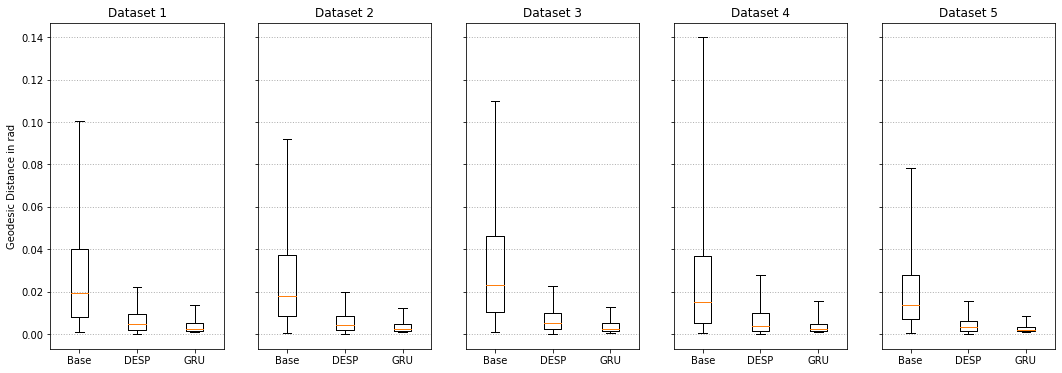

In [14]:
########################################
# Plot Boxplots for Rotation
########################################

boxplot_rotation(Path_results_dataset01_Baseline_quat + "/Evaluation", Path_results_dataset01_DESP + "8_2209_v01/Evaluation", Path_results_dataset01_GRU_quat + "7_2409_v01/Evaluation", Path_figures_dataset01)

In [15]:
base_path = Path_results_dataset01_Baseline_quat + "/Evaluation"
desp_path = Path_results_dataset01_DESP + "8_2209_v01/Evaluation"
gru_path = Path_results_dataset01_GRU_quat + "7_2409_v01/Evaluation"

In [23]:
########################################
# Plot CDF of rotation
########################################

def cdf(rot_base, rot_desp, rot_gru, pos_base, pos_desp, pos_gru, figures_path):
    
    labels = ('Base','DESP','GRU') 

    ####################################################################################
    print('---------------------Rotation--------------------------------------')
    #################################################################################### 
    
    ##########################################
    # Dataset 1 
    ##########################################

    for csv_pos in get_csv_files(rot_base, "1*con*dists"):
        print(csv_pos) 
        rot_base_1 = pd.read_csv(csv_pos)
        rot_base_1.columns = ['ang_dists','euc_dists']
        rot_base_1 = rot_base_1['ang_dists']

    for csv_pos in get_csv_files(rot_desp, "1*con*quat*dists"):
        print(csv_pos) 
        rot_desp_1 = pd.read_csv(csv_pos)
        rot_desp_1.columns = ['ang_dists']
        rot_desp_1 = rot_desp_1['ang_dists']


    for csv_rot in get_csv_files(rot_gru, "1*dists"):
        print(csv_pos) 
        rot_gru_1 = pd.read_csv(csv_rot)
        rot_gru_1.columns = ['ang_dists','euc_dists']
        rot_gru_1 = rot_gru_1['ang_dists']
    
    print('-----------------------------------------------------------')
        
    ##########################################
    # Dataset 2
    ##########################################

    for csv_pos in get_csv_files(rot_base, "2*con*dists"):
        print(csv_pos) 
        rot_base_2 = pd.read_csv(csv_pos)
        rot_base_2.columns = ['ang_dists','euc_dists']
        rot_base_2 = rot_base_2['ang_dists']

    for csv_pos in get_csv_files(rot_desp, "2*con*quat*dists"):
        print(csv_pos)  
        rot_desp_2 = pd.read_csv(csv_pos)
        rot_desp_2.columns = ['ang_dists']
        rot_desp_2 = rot_desp_2['ang_dists']

    for csv_rot in get_csv_files(rot_gru, "2*dists"):
        print(csv_rot)        
        rot_gru_2 = pd.read_csv(csv_rot)
        rot_gru_2.columns = ['ang_dists','euc_dists']
        rot_gru_2 = rot_gru_2['ang_dists']
        
    print('-----------------------------------------------------------')

    ##########################################
    # Dataset 3
    ##########################################

    for csv_pos in get_csv_files(rot_base, "3*con*dists"):
        print(csv_pos) 
        rot_base_3 = pd.read_csv(csv_pos)
        rot_base_3.columns = ['ang_dists','euc_dists']
        rot_base_3 = rot_base_3['ang_dists']

    for csv_pos in get_csv_files(rot_desp, "3*con*quat*dists"):
        print(csv_pos)  
        rot_desp_3 = pd.read_csv(csv_pos)
        rot_desp_3.columns = ['ang_dists']
        rot_desp_3 = rot_desp_3['ang_dists']

    for csv_rot in get_csv_files(rot_gru, "3*dists"):
        print(csv_rot)        
        rot_gru_3 = pd.read_csv(csv_rot)
        rot_gru_3.columns = ['ang_dists','euc_dists']
        rot_gru_3 = rot_gru_3['ang_dists']
        
    print('-----------------------------------------------------------')

    ##########################################
    # Dataset 4 
    ##########################################

    for csv_pos in get_csv_files(rot_base, "4*con*dists"):
        print(csv_pos) 
        rot_base_4 = pd.read_csv(csv_pos)
        rot_base_4.columns = ['ang_dists','euc_dists']
        rot_base_4 = rot_base_4['ang_dists']

    for csv_pos in get_csv_files(rot_desp, "4*con*quat*dists"):
        print(csv_pos)  
        rot_desp_4 = pd.read_csv(csv_pos)
        rot_desp_4.columns = ['ang_dists']
        rot_desp_4 = rot_desp_4['ang_dists']

    for csv_rot in get_csv_files(rot_gru, "4*dists"):
        print(csv_rot)        
        rot_gru_4 = pd.read_csv(csv_rot)
        rot_gru_4.columns = ['ang_dists','euc_dists']
        rot_gru_4 = rot_gru_4['ang_dists']

    print('-----------------------------------------------------------')
    
    ##########################################
    # Dataset 5 
    ##########################################

    for csv_pos in get_csv_files(rot_base, "5*con*dists"):
        print(csv_pos) 
        rot_base_5 = pd.read_csv(csv_pos)
        rot_base_5.columns = ['ang_dists','euc_dists']
        rot_base_5 = rot_base_5['ang_dists']

    for csv_pos in get_csv_files(rot_desp, "5*con*quat*dists"):
        print(csv_pos)  
        rot_desp_5 = pd.read_csv(csv_pos)
        rot_desp_5.columns = ['ang_dists']
        rot_desp_5 = rot_desp_5['ang_dists']

    for csv_rot in get_csv_files(rot_gru, "5*dists"):
        print(csv_rot)        
        rot_gru_5 = pd.read_csv(csv_rot)
        rot_gru_5.columns = ['ang_dists','euc_dists']
        rot_gru_5 = rot_gru_5['ang_dists']
        
    ####################################################################################
    print('---------------------Position--------------------------------------')
    #################################################################################### 

    ##########################################
    # Dataset 1 
    ##########################################
        
    for csv_pos in get_csv_files(pos_base, "1*dists"):
        print(csv_pos)
        pos_base_1 = pd.read_csv(csv_pos)
        pos_base_1.columns = ['euc_dists']
        pos_base_1 = pos_base_1['euc_dists']

            
    for csv_pos in get_csv_files(pos_desp, "1*pos*dists"):
        print(csv_pos)
        pos_desp_1 = pd.read_csv(csv_pos)
        pos_desp_1.columns = ['euc_dists']
        pos_desp_1 = pos_desp_1['euc_dists']
         
    for csv_pos in get_csv_files(pos_gru, "1*delta*dists"):
        print(csv_pos)
        pos_gru_1 = pd.read_csv(csv_pos)
        pos_gru_1.columns = ['euc_dists']
        pos_gru_1 = pos_gru_1['euc_dists']

    print('-----------------------------------------------------------')

    ##########################################
    # Dataset 2
    ##########################################

    for csv_pos in get_csv_files(pos_base, "2*dists"):
        print(csv_pos)
        pos_base_2 = pd.read_csv(csv_pos)
        pos_base_2.columns = ['euc_dists']
        pos_base_2 = pos_base_2['euc_dists']


    for csv_pos in get_csv_files(pos_desp, "2*pos*dists"):
        print(csv_pos)
        pos_desp_2 = pd.read_csv(csv_pos)
        pos_desp_2.columns = ['euc_dists']
        pos_desp_2 = pos_desp_2['euc_dists']

    for csv_pos in get_csv_files(pos_gru, "2*delta*dists"):
        print(csv_pos)
        pos_gru_2 = pd.read_csv(csv_pos)
        pos_gru_2.columns = ['euc_dists']
        pos_gru_2 = pos_gru_2['euc_dists']

    print('-----------------------------------------------------------')

    ##########################################
    # Dataset 3
    ##########################################

    for csv_pos in get_csv_files(pos_base, "3*dists"):
        pos_base_3 = pd.read_csv(csv_pos)
        pos_base_3.columns = ['euc_dists']
        pos_base_3 = pos_base_3['euc_dists']


    for csv_pos in get_csv_files(pos_desp, "3*pos*dists"):
        print(csv_pos)  
        pos_desp_3 = pd.read_csv(csv_pos)
        pos_desp_3.columns = ['euc_dists']
        pos_desp_3 = pos_desp_3['euc_dists']

    for csv_rot in get_csv_files(pos_gru, "3*delta*dists"):
        print(csv_rot)        
        pos_gru_3 = pd.read_csv(csv_rot)
        pos_gru_3.columns = ['euc_dists']
        pos_gru_3 = pos_gru_3['euc_dists']

    print('-----------------------------------------------------------')

    ##########################################
    # Dataset 4 
    ##########################################

    for csv_pos in get_csv_files(pos_base, "4*dists"):
        pos_base_4 = pd.read_csv(csv_pos)
        pos_base_4.columns = ['euc_dists']
        pos_base_4 = pos_base_4['euc_dists']

    for csv_pos in get_csv_files(pos_desp, "4*pos*dists"):
        print(csv_pos)  
        pos_desp_4 = pd.read_csv(csv_pos)
        pos_desp_4.columns = ['euc_dists']
        pos_desp_4 = pos_desp_4['euc_dists']

    for csv_rot in get_csv_files(pos_gru, "4*delta*dists"):
        print(csv_rot)        
        pos_gru_4 = pd.read_csv(csv_rot)
        pos_gru_4.columns = ['euc_dists']
        pos_gru_4 = pos_gru_4['euc_dists']

    print('-----------------------------------------------------------')

    ##########################################
    # Dataset 5 
    ##########################################

    for csv_pos in get_csv_files(pos_base, "5*dists"):
        pos_base_5 = pd.read_csv(csv_pos)
        pos_base_5.columns = ['euc_dists']
        pos_base_5 = pos_base_5['euc_dists']

    for csv_pos in get_csv_files(pos_desp, "5*pos*dists"):
        print(csv_pos)  
        pos_desp_5 = pd.read_csv(csv_pos)
        pos_desp_5.columns = ['euc_dists']
        pos_desp_5 = pos_desp_5['euc_dists']

    for csv_rot in get_csv_files(pos_gru, "5*delta*ists"):
        print(csv_rot)        
        pos_gru_5 = pd.read_csv(csv_rot)
        pos_gru_5.columns = ['euc_dists']
        pos_gru_5 = pos_gru_5['euc_dists']

    print('-----------------------------------------------------------')
    
    ####################################################################################
    # Plots
    #################################################################################### 
    
    fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(24, 24))
    
    axs[0,0].plot(np.sort(rot_base_1), (np.arange(len(rot_base_1)) / float(len(rot_base_1))), label = 'Baseline')
    axs[0,0].plot(np.sort(rot_desp_1), (np.arange(len(rot_desp_1)) / float(len(rot_desp_1))), label = 'DESP')
    axs[0,0].plot(np.sort(rot_gru_1), (np.arange(len(rot_gru_1)) / float(len(rot_gru_1))), label = 'GRU')
    axs[0,0].set_ylabel('Data Properties')
    #axs[0].set_xlabel('Geodesic Distance in rad')
    axs[0,0].set_title('Dataset 1 Rotation')
    axs[0,0].legend(shadow=True, fancybox=True)
    
    axs[0,1].plot(np.sort(pos_base_1), (np.arange(len(pos_base_1)) / float(len(pos_base_1))), label = 'Baseline')
    axs[0,1].plot(np.sort(pos_desp_1), (np.arange(len(pos_desp_1)) / float(len(pos_desp_1))), label = 'DESP')
    axs[0,1].plot(np.sort(pos_gru_1), (np.arange(len(pos_gru_1)) / float(len(pos_gru_1))), label = 'GRU')
    axs[0,1].set_ylabel('Data Properties')
    #axs[0].set_xlabel('Geodesic Distance in rad')
    axs[0,1].set_title('Dataset 1 Position')
    axs[0,1].legend(shadow=True, fancybox=True)
    
    axs[1,0].plot(np.sort(rot_base_2), (np.arange(len(rot_base_2)) / float(len(rot_base_2))), label = 'Baseline')
    axs[1,0].plot(np.sort(rot_desp_2), (np.arange(len(rot_desp_2)) / float(len(rot_desp_2))), label = 'DESP')
    axs[1,0].plot(np.sort(rot_gru_2), (np.arange(len(rot_gru_2)) / float(len(rot_gru_2))), label = 'GRU')
    axs[1,0].set_ylabel('Data Properties')
    #axs[1].set_xlabel('Geodesic Distance in rad')
    axs[1,0].set_title('Dataset 2 Rotation')
    axs[1,0].legend(shadow=True, fancybox=True)
    
    axs[1,1].plot(np.sort(pos_base_2), (np.arange(len(pos_base_2)) / float(len(pos_base_2))), label = 'Baseline')
    axs[1,1].plot(np.sort(pos_desp_2), (np.arange(len(pos_desp_2)) / float(len(pos_desp_2))), label = 'DESP')
    axs[1,1].plot(np.sort(pos_gru_2), (np.arange(len(pos_gru_2)) / float(len(pos_gru_2))), label = 'GRU')
    axs[1,1].set_ylabel('Data Properties')
    #axs[1].set_xlabel('Geodesic Distance in rad')
    axs[1,1].set_title('Dataset 2 Position')
    axs[1,1].legend(shadow=True, fancybox=True)
    
    axs[2,0].plot(np.sort(rot_base_3), (np.arange(len(rot_base_3)) / float(len(rot_base_3))), label = 'Baseline')
    axs[2,0].plot(np.sort(rot_desp_3), (np.arange(len(rot_desp_3)) / float(len(rot_desp_3))), label = 'DESP')
    axs[2,0].plot(np.sort(rot_gru_3), (np.arange(len(rot_gru_3)) / float(len(rot_gru_3))), label = 'GRU')
    axs[2,0].set_ylabel('Data Properties')
    #axs[2].set_xlabel('Geodesic Distance in rad')
    axs[2,0].set_title('Dataset 3 Rotation')
    axs[2,0].legend(shadow=True, fancybox=True)
    
    axs[2,1].plot(np.sort(pos_base_3), (np.arange(len(pos_base_3)) / float(len(pos_base_3))), label = 'Baseline')
    axs[2,1].plot(np.sort(pos_desp_3), (np.arange(len(pos_desp_3)) / float(len(pos_desp_3))), label = 'DESP')
    axs[2,1].plot(np.sort(pos_gru_3), (np.arange(len(pos_gru_3)) / float(len(pos_gru_3))), label = 'GRU')
    axs[2,1].set_ylabel('Data Properties')
    #axs[2].set_xlabel('Geodesic Distance in rad')
    axs[2,1].set_title('Dataset 3 Position')
    axs[2,1].legend(shadow=True, fancybox=True)
    
    axs[3,0].plot(np.sort(rot_base_4), (np.arange(len(rot_base_4)) / float(len(rot_base_4))), label = 'Baseline')
    axs[3,0].plot(np.sort(rot_desp_4), (np.arange(len(rot_desp_4)) / float(len(rot_desp_4))), label = 'DESP')
    axs[3,0].plot(np.sort(rot_gru_4), (np.arange(len(rot_gru_4)) / float(len(rot_gru_4))), label = 'GRU')
    axs[3,0].set_ylabel('Data Properties')
    #axs[3].set_xlabel('Geodesic Distance in rad')
    axs[3,0].set_title('Dataset 4 Rotation')
    axs[3,0].legend(shadow=True, fancybox=True)
    
    axs[3,1].plot(np.sort(pos_base_4), (np.arange(len(pos_base_4)) / float(len(pos_base_4))), label = 'Baseline')
    axs[3,1].plot(np.sort(pos_desp_4), (np.arange(len(pos_desp_4)) / float(len(pos_desp_4))), label = 'DESP')
    axs[3,1].plot(np.sort(pos_gru_4), (np.arange(len(pos_gru_4)) / float(len(pos_gru_4))), label = 'GRU')
    axs[3,1].set_ylabel('Data Properties')
    #axs[3].set_xlabel('Geodesic Distance in rad')
    axs[3,1].set_title('Dataset 4 Position')
    axs[3,1].legend(shadow=True, fancybox=True)
    
    axs[4,0].plot(np.sort(rot_base_5), (np.arange(len(rot_base_5)) / float(len(rot_base_5))), label = 'Baseline')
    axs[4,0].plot(np.sort(rot_desp_5), (np.arange(len(rot_desp_5)) / float(len(rot_desp_5))), label = 'DESP')
    axs[4,0].plot(np.sort(rot_gru_5), (np.arange(len(rot_gru_5)) / float(len(rot_gru_5))), label = 'GRU')
    axs[4,0].set_ylabel('Data Properties')
    axs[4,0].set_xlabel('Geodesic Distance in rad')
    axs[4,0].set_title('Dataset 5 Rotation')
    axs[4,0].legend(shadow=True, fancybox=True)
    
    axs[4,1].plot(np.sort(pos_base_5), (np.arange(len(pos_base_5)) / float(len(pos_base_5))), label = 'Baseline')
    axs[4,1].plot(np.sort(pos_desp_5), (np.arange(len(pos_desp_5)) / float(len(pos_desp_5))), label = 'DESP')
    axs[4,1].plot(np.sort(pos_gru_5), (np.arange(len(pos_gru_5)) / float(len(pos_gru_5))), label = 'GRU')
    axs[4,1].set_ylabel('Data Properties')
    axs[4,1].set_xlabel('Euclidean Distance in m')
    axs[4,1].set_title('Dataset 5 Position')
    axs[4,1].legend(shadow=True, fancybox=True)
    

    for ax in axs.flat:
        ax.yaxis.grid(which='major', linestyle='dotted', linewidth=1)
        ax.xaxis.grid(which='major', linestyle='dotted', linewidth=1)
        ax.set_xlim(0, 0.03)
        
    dest = os.path.join(figures_path, 'Boxplots_Rotation.pdf')
    fig.savefig(dest, facecolor='white')
    logging.info("Saving rotation boxplots to {}".format(dest))

---------------------Rotation--------------------------------------
C:/Users/Thomas Weikert/Documents/Thesis/Project_V07_24092021/Results/01_Dataset/Baseline_quat//Evaluation\1_full_continious_result_delta_rot_dists.csv
C:/Users/Thomas Weikert/Documents/Thesis/Project_V07_24092021/Results/01_Dataset/DESP/8_2209_v01/Evaluation\1_full_continious_delta_quat_dists.csv
C:/Users/Thomas Weikert/Documents/Thesis/Project_V07_24092021/Results/01_Dataset/DESP/8_2209_v01/Evaluation\1_full_continious_delta_quat_dists.csv
-----------------------------------------------------------
C:/Users/Thomas Weikert/Documents/Thesis/Project_V07_24092021/Results/01_Dataset/Baseline_quat//Evaluation\2_full_continious_result_delta_rot_dists.csv
C:/Users/Thomas Weikert/Documents/Thesis/Project_V07_24092021/Results/01_Dataset/DESP/8_2209_v01/Evaluation\2_full_continious_delta_quat_dists.csv
C:/Users/Thomas Weikert/Documents/Thesis/Project_V07_24092021/Results/01_Dataset/GRU_quat/7_2409_v01/Evaluation\2_full_continio

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:349: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


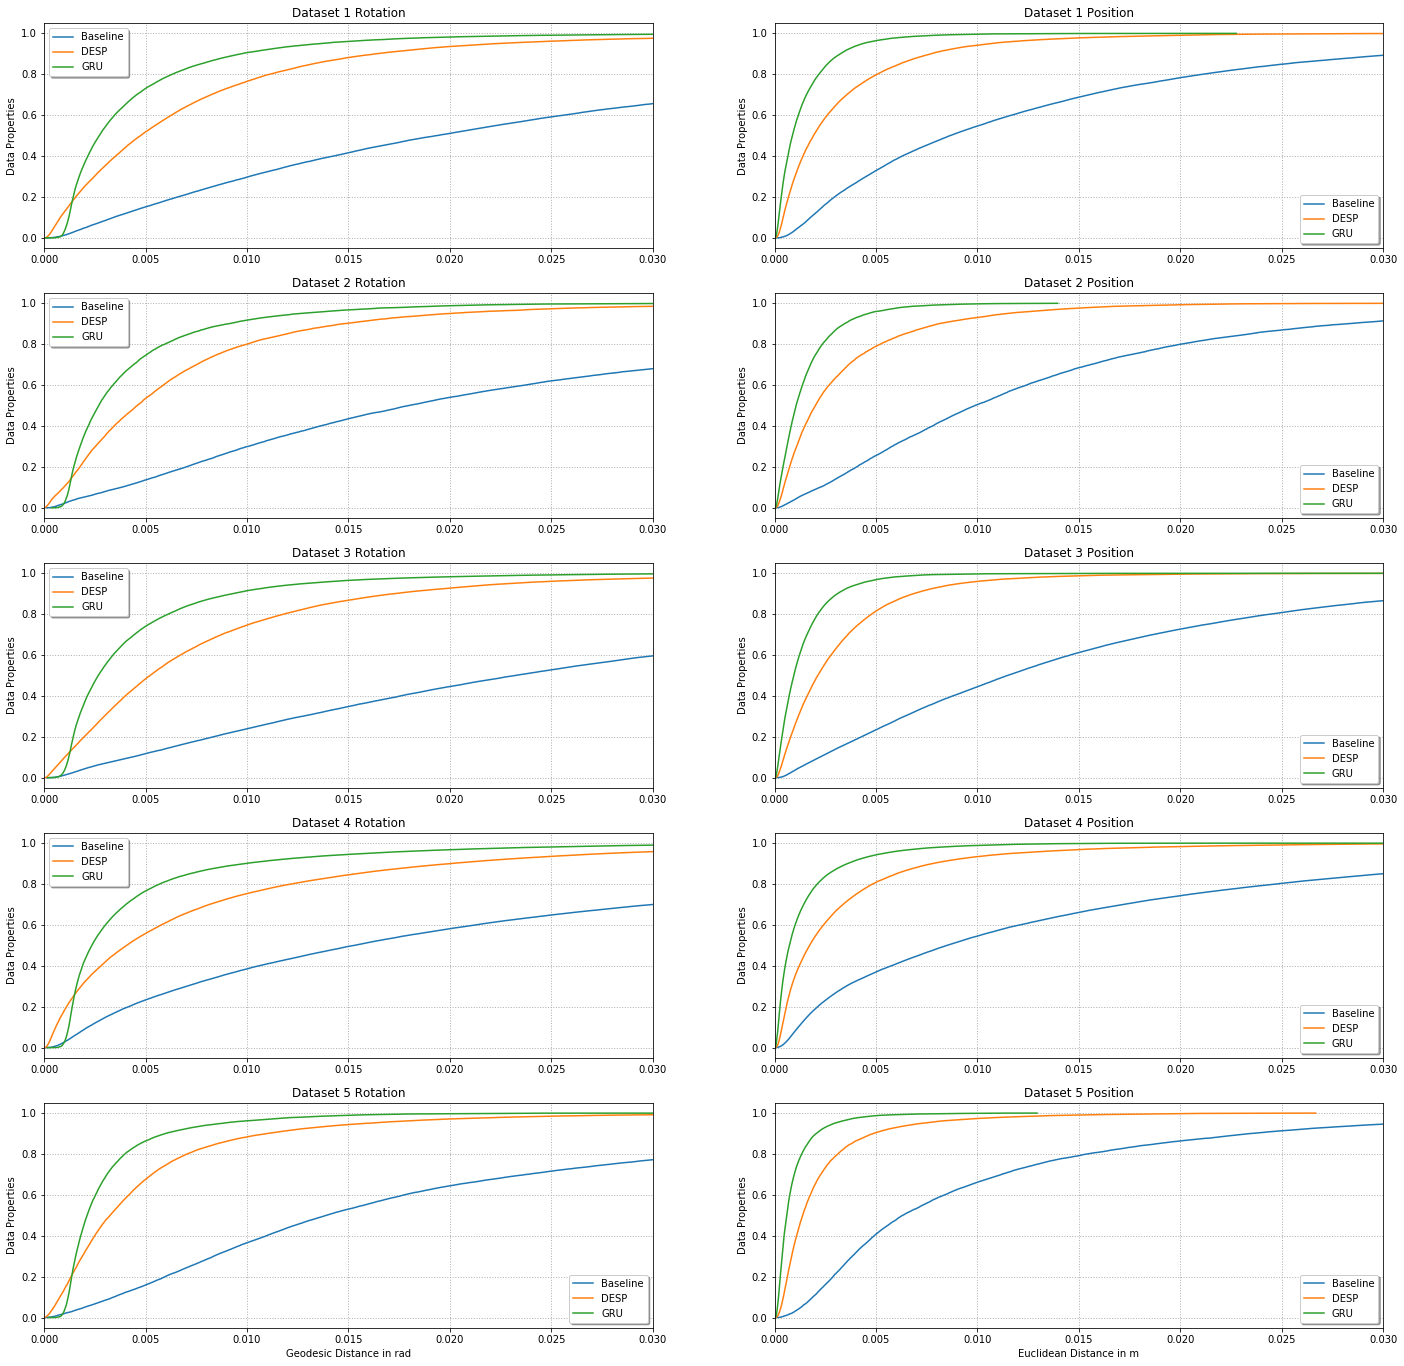

In [24]:
########################################
# Plot Boxplots for Rotation
########################################

rot_base = Path_results_dataset01_Baseline_quat + "/Evaluation"
rot_desp = Path_results_dataset01_DESP + "8_2209_v01/Evaluation"
rot_gru = Path_results_dataset01_GRU_quat + "7_2409_v01/Evaluation"

pos_base = Path_results_dataset01_Baseline_pos + "/Evaluation"
pos_desp = Path_results_dataset01_DESP + "8_2209_v01/Evaluation"
pos_gru = Path_results_dataset01_GRU_pos + "7_2409_v01/Evaluation"

cdf(rot_base, rot_desp, rot_gru, pos_base, pos_desp, pos_gru,  Path_figures_dataset01)

In [369]:
########################################
# Plot Density of each model for pos Traces  
########################################

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white", palette="muted", color_codes=True)
#rs = np.random.RandomState(10)

gru = Path_results_dataset01_GRU_pos + "/7_2409_v01" + "/Evaluation"
desp = Path_results_dataset01_DESP + "/8_2209_v01" + "/Evaluation"
base = Path_results_dataset01_Baseline_pos + "/Evaluation"
 

gru_list = []
desp_list = []
base_list = []


# Generate a random univariate dataset
for data in get_csv_files(gru, "delta*dists*"):
            print(data)        
            gru = pd.read_csv(data)
            gru.columns = ['euc_dists']
            gru = gru.to_numpy()
            gru_list.append(gru)
            
# Generate a random univariate dataset
for data in get_csv_files(desp, "dists"):
            print(data)        
            desp = pd.read_csv(data)
            desp.columns = ['euc_dists']
            desp = desp.to_numpy()
            desp_list.append(desp)

# Generate a random univariate dataset
for data in get_csv_files(base, "pos_dists"):
            print(data)        
            base = pd.read_csv(data)
            base.columns = ['euc_dists']
            base = base.to_numpy()
            base_list.append(base)

# Set up the matplotlib figure
#f, axes = plt.subplots(1, 5, figsize=(20, 10), sharex=True)
#sns.despine(left=True)
            
            
for i in range(len(gru_list)):
    
    # Set up the matplotlib figure
    f, axes = plt.subplots(1, 3, figsize=(20, 10), sharex=True)
    sns.despine(left=True)
    
    # Plot a simple histogram with binsize determined automatically
    #sns.distplot(gru, kde=False, color="b", ax=axes[0])
    sns.distplot(gru_list[i], hist=False, color="g", kde_kws={"shade": True}, ax=axes[0] , axlabel = "Gru Position")

    # Plot a kernel density estimate and rug plot
    sns.distplot(desp_list[i], hist=False, color="r", kde_kws={"shade": True}, ax=axes[1], axlabel = "DESP Position")

    # Plot a filled kernel density estimate
    sns.distplot(base_list[i], hist=False, color="b", kde_kws={"shade": True}, ax=axes[2], axlabel = "Baseline Position")

    plt.setp(axes, yticks=[])
    plt.tight_layout()
        
    # Plot a simple histogram with binsize determined automatically
    #sns.distplot(gru_list[i], hist=False, color="g", kde_kws={"shade": True}, label = "GRU Position", ax=axes[i], axlabel = i+1 )

    # Plot a kernel density estimate and rug plot
    #sns.distplot(desp_list[i], hist=False, color="r", kde_kws={"shade": True}, label = "DESP Position" , ax=axes[i], axlabel = i+1)

    # Plot a filled kernel density estimate
    #sns.distplot(base_list[i], hist=False, color="b", kde_kws={"shade": True}, label = "Baseline Position" , ax=axes[i], axlabel = i+1)
    
    #plt.setp(axes, yticks=[])
    #plt.tight_layout()
    plt.legend()
    
    dest = os.path.join(Path_figures_dataset01 + "/Density", "{}_density_pos.pdf".format(i))
    #dest = os.path.join(Path_figures_dataset01 + "/Density", "overlapping_density_pos.pdf")
    plt.savefig(dest)
    plt.clf() 

C:/Users/weikert1/Documents/Thesis/Project_V07_24092021/Results/01_Dataset/GRU_pos//7_2409_v01/Evaluation\1_full_continious_result_delta_pos_dists.csv
C:/Users/weikert1/Documents/Thesis/Project_V07_24092021/Results/01_Dataset/GRU_pos//7_2409_v01/Evaluation\2_full_continious_result_delta_pos_dists.csv
C:/Users/weikert1/Documents/Thesis/Project_V07_24092021/Results/01_Dataset/GRU_pos//7_2409_v01/Evaluation\3_full_continious_result_delta_pos_dists.csv
C:/Users/weikert1/Documents/Thesis/Project_V07_24092021/Results/01_Dataset/GRU_pos//7_2409_v01/Evaluation\4_full_continious_result_delta_pos_dists.csv
C:/Users/weikert1/Documents/Thesis/Project_V07_24092021/Results/01_Dataset/GRU_pos//7_2409_v01/Evaluation\5_full_continious_result_delta_pos_dists.csv
C:/Users/weikert1/Documents/Thesis/Project_V07_24092021/Results/01_Dataset/DESP//8_2209_v01/Evaluation\1_full_continious_delta_quat_dists.csv
C:/Users/weikert1/Documents/Thesis/Project_V07_24092021/Results/01_Dataset/DESP//8_2209_v01/Evaluation\

C:\Users\weikert1\anaconda3\envs\thesis_gpu\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\weikert1\anaconda3\envs\thesis_gpu\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\weikert1\anaconda3\envs\thesis_gpu\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

C:/Users/weikert1/Documents/Thesis/Project_V07_24092021/Results/01_Dataset/GRU_quat//7_2409_v01/Evaluation\1_full_continious_result_delta_rot_dists.csv
C:/Users/weikert1/Documents/Thesis/Project_V07_24092021/Results/01_Dataset/GRU_quat//7_2409_v01/Evaluation\2_full_continious_result_delta_rot_dists.csv
C:/Users/weikert1/Documents/Thesis/Project_V07_24092021/Results/01_Dataset/GRU_quat//7_2409_v01/Evaluation\3_full_continious_result_delta_rot_dists.csv
C:/Users/weikert1/Documents/Thesis/Project_V07_24092021/Results/01_Dataset/GRU_quat//7_2409_v01/Evaluation\4_full_continious_result_delta_rot_dists.csv
C:/Users/weikert1/Documents/Thesis/Project_V07_24092021/Results/01_Dataset/GRU_quat//7_2409_v01/Evaluation\5_full_continious_result_delta_rot_dists.csv
C:/Users/weikert1/Documents/Thesis/Project_V07_24092021/Results/01_Dataset/DESP//8_2209_v01/Evaluation\1_full_continious_delta_quat_dists.csv
C:/Users/weikert1/Documents/Thesis/Project_V07_24092021/Results/01_Dataset/DESP//8_2209_v01/Evalua

C:\Users\weikert1\anaconda3\envs\thesis_gpu\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\weikert1\anaconda3\envs\thesis_gpu\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\weikert1\anaconda3\envs\thesis_gpu\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a

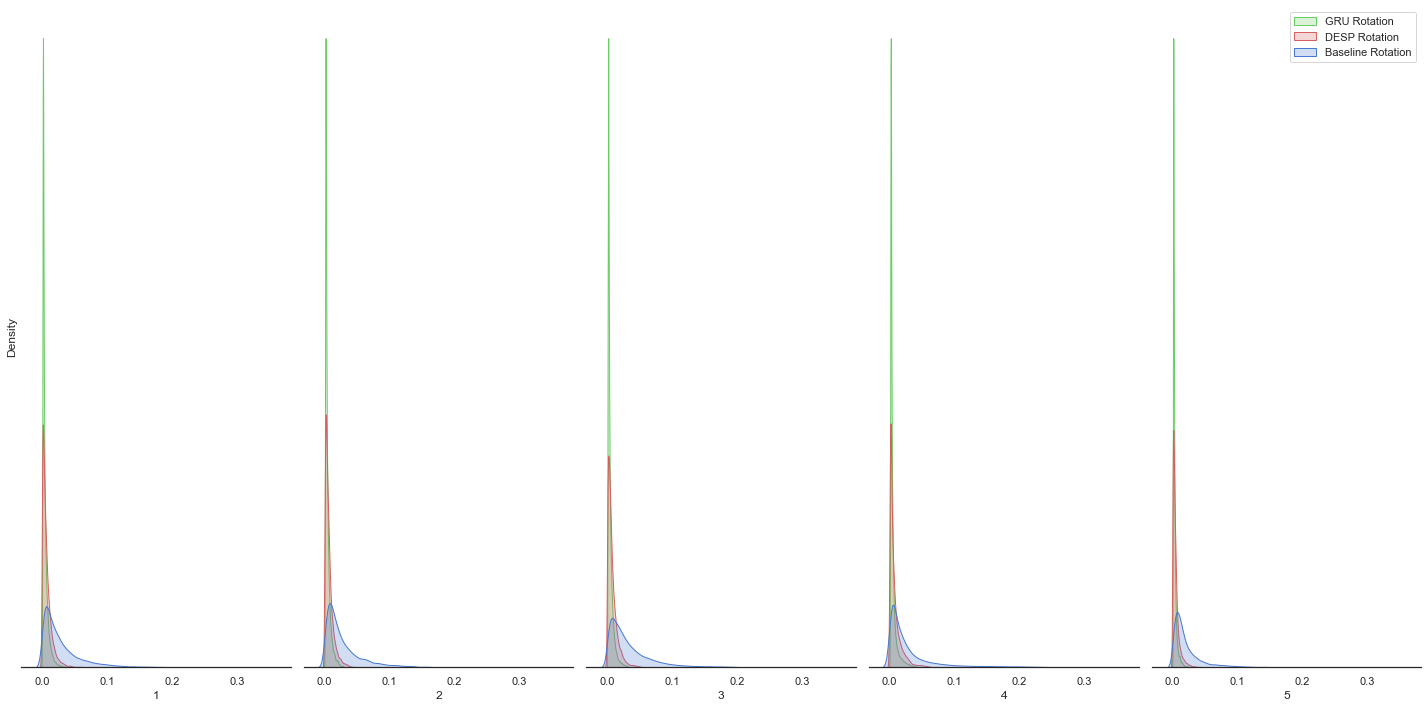

In [366]:
########################################
# Plot Density of each model for rot Traces  
########################################

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white", palette="muted", color_codes=True)
#rs = np.random.RandomState(10)

gru = Path_results_dataset01_GRU_quat + "/7_2409_v01" + "/Evaluation"
desp = Path_results_dataset01_DESP + "/8_2209_v01" + "/Evaluation"
base = Path_results_dataset01_Baseline_quat + "/Evaluation"
 

gru_list = []
desp_list = []
base_list = []


# Generate a random univariate dataset
for data in get_csv_files(gru, "delta*dists*"):
            print(data)        
            gru = pd.read_csv(data)
            gru.columns = ['ang_dists','euc_dists']
            gru['ang_dists'] = gru.to_numpy()
            gru_list.append(gru)
            
# Generate a random univariate dataset
for data in get_csv_files(desp, "quat*dists"):
            print(data)        
            desp = pd.read_csv(data)
            desp.columns = ['ang_dists']
            desp = desp.to_numpy()
            desp_list.append(desp)

# Generate a random univariate dataset
for data in get_csv_files(base, "delta*dists"):
            print(data)        
            base = pd.read_csv(data)
            base.columns = ['ang_dists', 'euc_dists']
            base['ang_dists'] = base.to_numpy()
            base_list.append(base)

            
            
# Set up the matplotlib figure
f, axes = plt.subplots(1, 5, figsize=(20, 10), sharex=True)
sns.despine(left=True)
            
for i in range(len(gru_list)):
    
    # Plot a simple histogram with binsize determined automatically
    #sns.distplot(gru, kde=False, color="b", ax=axes[0])
    sns.distplot(gru_list[i], hist=False, color="g", kde_kws={"shade": True}, ax=axes[i] , label = "GRU Rotation",   axlabel = i+1 )

    # Plot a kernel density estimate and rug plot
    sns.distplot(desp_list[i], hist=False, color="r", kde_kws={"shade": True}, label = "DESP Rotation" ,ax=axes[i], axlabel = i+1)

    # Plot a filled kernel density estimate
    sns.distplot(base_list[i], hist=False, color="b", kde_kws={"shade": True}, label = "Baseline Rotation" , ax=axes[i], axlabel = i+1)

    plt.setp(axes, yticks=[])
    plt.tight_layout()
    plt.legend()
    
    #dest = os.path.join(Path_figures_dataset01 + "/Density", "{}_density_rot.pdf".format(i))
    dest = os.path.join(Path_figures_dataset01 + "/Density", "overlapping_density_rot.pdf")
    plt.savefig(dest)
    #plt.clf() 

In [12]:
########################################
# Plot error of each model for pos Traces  
########################################

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


sns.set(style="white", palette="muted", color_codes=True)
#rs = np.random.RandomState(10)

gru = Path_results_dataset01_GRU_pos + "/7_2409_v01" + "/Evaluation"
desp = Path_results_dataset01_DESP + "/8_2209_v01" + "/Evaluation"
base = Path_results_dataset01_Baseline_pos + "/Evaluation"
 

gru_list = []
desp_list = []
base_list = []


# Generate a random univariate dataset
for data in get_csv_files(gru, "*delta*pos*dists*"):
            print(data)        
            gru = pd.read_csv(data)
            gru = gru[10000:13000]
            gru.columns = ['euc_dists']
            gru = gru.to_numpy()
            gru_list.append(gru)
            
# Generate a random univariate dataset
for data in get_csv_files(desp, "*delta*dists"):
            print(data)        
            desp = pd.read_csv(data)
            desp = desp[10000:13000]
            desp.columns = ['euc_dists']
            desp = desp.to_numpy()
            #print(desp)
            desp_list.append(desp)

# Generate a random univariate dataset
for data in get_csv_files(base, "*pos_dists"):
            print(data)        
            base = pd.read_csv(data)
            base = base[10000:13000]
            base.columns = ['euc_dists']
            base = base.to_numpy()
            base_list.append(base)
      
            
#Set up the matplotlib figure
#f, axes = plt.subplots(1, 3, figsize=(20, 10), sharex=True)
            
for i in range(len(gru_list)):
    # Plot a simple histogram with binsize determined automatically
    

    figure(figsize=(20, 10))
    
    #plt.set_xlabel('Trace')
    #plt.set_ylabel('Geodesic Distance')
    
    #sns.despine(left=True)
    plt.plot(base_list[i] , 'b' , label = "Baseline Position")
    
    plt.plot(desp_list[i], 'r' , label = "DESP Position")

    plt.plot(gru_list[i], 'g' , label = "GRU Position")

    
    #plt.setp(axes, yticks=[])
    plt.tight_layout()
    plt.legend()
    
    dest = os.path.join(Path_figures_dataset01 + "/Error", "{}_pos_error.pdf".format(i+1))
    #dest = os.path.join(Path_figures_dataset01 + "/Error", "error.pdf")
    plt.savefig(dest)
    plt.clf() 

C:/Users/Thomas Weikert/Documents/Thesis/Project_V07_24092021/Results/01_Dataset/GRU_pos//7_2409_v01/Evaluation\1_full_continious_result_delta_pos_dists.csv
C:/Users/Thomas Weikert/Documents/Thesis/Project_V07_24092021/Results/01_Dataset/GRU_pos//7_2409_v01/Evaluation\2_full_continious_result_delta_pos_dists.csv
C:/Users/Thomas Weikert/Documents/Thesis/Project_V07_24092021/Results/01_Dataset/GRU_pos//7_2409_v01/Evaluation\3_full_continious_result_delta_pos_dists.csv
C:/Users/Thomas Weikert/Documents/Thesis/Project_V07_24092021/Results/01_Dataset/GRU_pos//7_2409_v01/Evaluation\4_full_continious_result_delta_pos_dists.csv
C:/Users/Thomas Weikert/Documents/Thesis/Project_V07_24092021/Results/01_Dataset/GRU_pos//7_2409_v01/Evaluation\5_full_continious_result_delta_pos_dists.csv
C:/Users/Thomas Weikert/Documents/Thesis/Project_V07_24092021/Results/01_Dataset/DESP//8_2209_v01/Evaluation\1_full_continious_delta_quat_dists.csv
C:/Users/Thomas Weikert/Documents/Thesis/Project_V07_24092021/Resul

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

C:/Users/Thomas Weikert/Documents/Thesis/Project_V07_24092021/Results/01_Dataset/GRU_pos//7_2409_v01/Evaluation\2_full_continious_result_delta_pos_dists.csv
C:/Users/Thomas Weikert/Documents/Thesis/Project_V07_24092021/Results/01_Dataset/DESP//8_2209_v01/Evaluation\2_full_continious_delta_quat_dists.csv
C:/Users/Thomas Weikert/Documents/Thesis/Project_V07_24092021/Results/01_Dataset/Baseline_pos//Evaluation\2_full_continious_result_pos_dists.csv
C:/Users/Thomas Weikert/Documents/Thesis/Project_V07_24092021/Data/01_Dataset\2_full_continious.csv


<function matplotlib.pyplot.show(*args, **kw)>

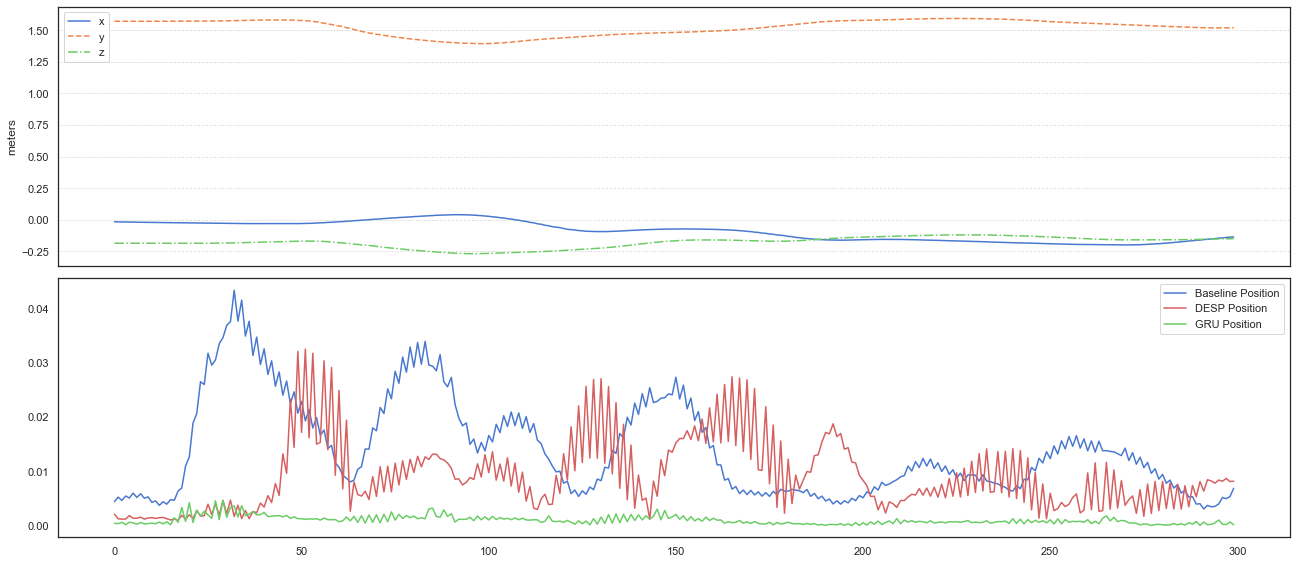

In [42]:
########################################
# Plot error + orginal trace of each model for pos Traces in subplot
########################################

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


sns.set(style="white", palette="muted", color_codes=True)
#rs = np.random.RandomState(10)

path = Path_dataset01_data
gru = Path_results_dataset01_GRU_pos + "/7_2409_v01" + "/Evaluation"
desp = Path_results_dataset01_DESP + "/8_2209_v01" + "/Evaluation"
base = Path_results_dataset01_Baseline_pos + "/Evaluation"
 

gru_list = []
desp_list = []
base_list = []


# Generate a random univariate dataset
for data in get_csv_files(gru, "2*delta*pos*dists*"):
            print(data)        
            gru = pd.read_csv(data)
            gru = gru[12000:12300]
            gru.columns = ['euc_dists']
            gru = gru.to_numpy()
            gru_list.append(gru)
            
# Generate a random univariate dataset
for data in get_csv_files(desp, "2*delta*dists"):
            print(data)        
            desp = pd.read_csv(data)
            desp = desp[12000:12300]
            desp.columns = ['euc_dists']
            desp = desp.to_numpy()
            #print(desp)
            desp_list.append(desp)

# Generate a random univariate dataset
for data in get_csv_files(base, "2*pos_dists"):
            print(data)        
            base = pd.read_csv(data)
            base = base[12000:12300]
            base.columns = ['euc_dists']
            base = base.to_numpy()
            base_list.append(base)
            
for csv in get_csv_files(path, "2*full_cont"):
        print(csv)
        df = pd.read_csv(csv)
        df = df[12000:12300]
        #ts = len(df)
        ts = np.arange(0, df.shape[0])
        df.columns = cfg['pos_coords']  + cfg['quat_coords']
        #print(df)        


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 8), sharex=True)

# Plot position
ax1.plot(ts, df['x'], label='x')
ax1.plot(ts, df['y'], label='y', linestyle='--')
ax1.plot(ts, df['z'], label='z', linestyle='-.')
ax1.set_ylabel('meters')
##ax1.set_xlim(0, 60)
ax1.legend(loc='upper left')
ax1.yaxis.grid(which='major', linestyle='dotted', linewidth=1)
#ax1.xaxis.set_major_locator(MultipleLocator(10))

# Plot orientation
ax2.plot(base_list[0] , 'b' , label = "Baseline Position")
ax2.plot(desp_list[0], 'r' , label = "DESP Position")
ax2.plot(gru_list[0], 'g' , label = "GRU Position")
#ax2.set_xlabel('frames')
#ax2.set_ylabel('quaternion')
#ax2.set_xlim(0, 60)
#ax2.legend(loc='upper left')
#ax2.yaxis.grid(which='major', linestyle='dotted', linewidth=1)
#ax2.xaxis.set_major_locator(MultipleLocator(10))


####

 
#plt.setp(axes, yticks=[])
plt.tight_layout()
plt.legend()

#dest = os.path.join(Path_figures_dataset01 + "/Error", "{}_pos_error.pdf".format(i+1))
#dest = os.path.join(Path_figures_dataset01 + "/Error", "error.pdf")
#plt.savefig(dest)
plt.show

C:/Users/Thomas Weikert/Documents/Thesis/Project_V07_24092021/Results/01_Dataset/GRU_quat//7_2409_v01/Evaluation\2_full_continious_result_rot_dists.csv
C:/Users/Thomas Weikert/Documents/Thesis/Project_V07_24092021/Results/01_Dataset/DESP//8_2209_v01/Evaluation\2_full_continious_delta_quat_dists.csv
C:/Users/Thomas Weikert/Documents/Thesis/Project_V07_24092021/Results/01_Dataset/Baseline_quat//Evaluation\2_full_continious_result_delta_rot_dists.csv
C:/Users/Thomas Weikert/Documents/Thesis/Project_V07_24092021/Data/01_Dataset\2_full_continious.csv


<function matplotlib.pyplot.show(*args, **kw)>

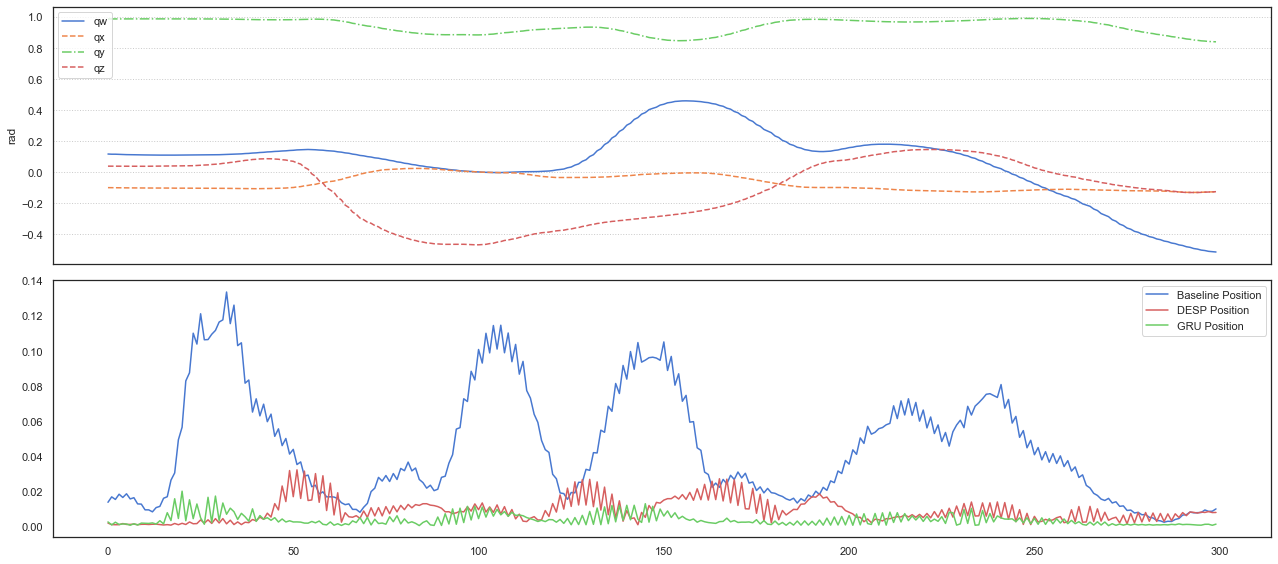

In [41]:
########################################
# Plot error + orginal trace of each model for rot Traces in subplot
########################################

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


sns.set(style="white", palette="muted", color_codes=True)
#rs = np.random.RandomState(10)

path = Path_dataset01_data
gru = Path_results_dataset01_GRU_quat + "/7_2409_v01" + "/Evaluation"    
desp = Path_results_dataset01_DESP + "/8_2209_v01" + "/Evaluation"
base = Path_results_dataset01_Baseline_quat + "/Evaluation"
 

gru_list = []
desp_list = []
base_list = []


# Generate a random univariate dataset
for data in get_csv_files(gru, "*2*rot*dists"):
            print(data)        
            gru = pd.read_csv(data)
            gru = gru[12000:12300]
            gru.columns = ['ang_dists', 'euc_dists']
            gru = gru['ang_dists'].to_numpy()
            gru_list.append(gru)
            
# Generate a random univariate dataset
for data in get_csv_files(desp, "2*delta*quat*dists"):
            print(data)        
            desp = pd.read_csv(data)
            desp = desp[12000:12300]
            desp.columns = ['euc_dists']
            desp = desp.to_numpy()
            #print(desp)
            desp_list.append(desp)

# Generate a random univariate dataset
for data in get_csv_files(base, "2*delta_rot_dists"):
            print(data)        
            base = pd.read_csv(data)
            base = base[12000:12300]
            base.columns = ['ang_dists', 'euc_dists']
            base = base['ang_dists'].to_numpy()
            base_list.append(base)
            
for csv in get_csv_files(path, "2*full_cont"):
        print(csv)
        df = pd.read_csv(csv)
        df = df[12000:12300]
        #ts = len(df)
        ts = np.arange(0, df.shape[0])
        df.columns = cfg['pos_coords']  + cfg['quat_coords']
        #print(df)        


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 8), sharex=True)

# Plot position
ax1.plot(ts, df['qw'], label='qw')
ax1.plot(ts, df['qx'], label='qx', linestyle='--')
ax1.plot(ts, df['qy'], label='qy', linestyle='-.')
ax1.plot(ts, df['qz'], label='qz', linestyle='--')
ax1.set_ylabel('rad')
##ax1.set_xlim(0, 60)
ax1.legend(loc='upper left')
ax1.yaxis.grid(which='major', linestyle='dotted', linewidth=1)
#ax1.xaxis.set_major_locator(MultipleLocator(10))

# Plot orientation
ax2.plot(base_list[0] , 'b' , label = "Baseline Position")
ax2.plot(desp_list[0], 'r' , label = "DESP Position")
ax2.plot(gru_list[0], 'g' , label = "GRU Position")
#ax2.set_xlabel('frames')
#ax2.set_ylabel('quaternion')
#ax2.set_xlim(0, 60)
#ax2.legend(loc='upper left')
#ax2.yaxis.grid(which='major', linestyle='dotted', linewidth=1)
#ax2.xaxis.set_major_locator(MultipleLocator(10))


####

 
#plt.setp(axes, yticks=[])
plt.tight_layout()
plt.legend()

#dest = os.path.join(Path_figures_dataset01 + "/Error", "{}_pos_error.pdf".format(i+1))
#dest = os.path.join(Path_figures_dataset01 + "/Error", "error.pdf")
#plt.savefig(dest)
plt.show

In [ ]:
########################################
# Plot error for each predictor + traces for each predictor for rot Traces in subplot
########################################

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


sns.set(style="white", palette="muted", color_codes=True)
#rs = np.random.RandomState(10)

path = Path_dataset01_data
gru = Path_results_dataset01_GRU_quat + "/7_2409_v01" + "/Traces"    
desp = Path_results_dataset01_DESP + "/8_2209_v01" + "/Traces"
base = Path_results_dataset01_Baseline_quat + "/Traces"
 

gru_list = []
desp_list = []
base_list = []


for csv in get_csv_files(path, "2*full_cont"):
        print(csv)
        df = pd.read_csv(csv)
        df = df[12000:12300]
        #ts = len(df)
        ts = np.arange(0, df.shape[0])
        df.columns = cfg['pos_coords']  + cfg['quat_coords']

        

# Generate a random univariate dataset
for data in get_csv_files(gru, "*2*rot*dists"):
            print(data)        
            gru = pd.read_csv(data)
            gru = gru[12000:12300]
            gru.columns = cfg['quat_pred']  + cfg['quat_true']
            gru = gru['ang_dists'].to_numpy()
            gru_list.append(gru)
            
            
# Generate a random univariate dataset
#for data in get_csv_files(desp, "2*delta*quat*dists"):
 #           print(data)        
  #          desp = pd.read_csv(data)
   #         desp = desp[12000:12300]
    #        desp.columns = ['euc_dists']
     #       desp = desp.to_numpy()
      #      #print(desp)
       #     desp_list.append(desp)

# Generate a random univariate dataset
# for data in get_csv_files(base, "2*delta_rot_dists"):
  #          print(data)        
   #         base = pd.read_csv(data)
    #        base = base[12000:12300]
     #       base.columns = ['ang_dists', 'euc_dists']
      #      base = base['ang_dists'].to_numpy()
       #     base_list.append(base)
            
for csv in get_csv_files(path, "2*full_cont"):
        print(csv)
        df = pd.read_csv(csv)
        df = df[12000:12300]
        #ts = len(df)
        ts = np.arange(0, df.shape[0])
        df.columns = cfg['pos_coords']  + cfg['quat_coords']
        #print(df)        


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 8), sharex=True)

# Plot position
ax1.plot(ts, df['qw'], label='qw')
ax1.plot(ts, df['qx'], label='qx', linestyle='--')
ax1.plot(ts, df['qy'], label='qy', linestyle='-.')
ax1.plot(ts, df['qz'], label='qz', linestyle='--')
ax1.set_ylabel('rad')
##ax1.set_xlim(0, 60)
ax1.legend(loc='upper left')
ax1.yaxis.grid(which='major', linestyle='dotted', linewidth=1)
#ax1.xaxis.set_major_locator(MultipleLocator(10))

# Plot orientation
ax2.plot(base_list[0] , 'b' , label = "Baseline Position")
ax2.plot(desp_list[0], 'r' , label = "DESP Position")
ax2.plot(gru_list[0], 'g' , label = "GRU Position")
#ax2.set_xlabel('frames')
#ax2.set_ylabel('quaternion')
#ax2.set_xlim(0, 60)
#ax2.legend(loc='upper left')
#ax2.yaxis.grid(which='major', linestyle='dotted', linewidth=1)
#ax2.xaxis.set_major_locator(MultipleLocator(10))


####

 
#plt.setp(axes, yticks=[])
plt.tight_layout()
plt.legend()

#dest = os.path.join(Path_figures_dataset01 + "/Error", "{}_pos_error.pdf".format(i+1))
#dest = os.path.join(Path_figures_dataset01 + "/Error", "error.pdf")
#plt.savefig(dest)
plt.show

C:/Users/Thomas Weikert/Documents/Thesis/Project_V07_24092021/Data/01_Dataset\2_full_continious.csv
11000
C:/Users/Thomas Weikert/Documents/Thesis/Project_V07_24092021/Results/01_Dataset/GRU_quat//7_2409_v01/Traces\2_full_continious_result_rot.csv
C:/Users/Thomas Weikert/Documents/Thesis/Project_V07_24092021/Results/01_Dataset/DESP//8_2209_v01/Traces\2_full_continious_delta_result_quat_DESP.csv
C:/Users/Thomas Weikert/Documents/Thesis/Project_V07_24092021/Results/01_Dataset/Baseline_quat//Traces\2_full_continious_result_delta_rot.csv
C:/Users/Thomas Weikert/Documents/Thesis/Project_V07_24092021/Results/01_Dataset/GRU_quat//7_2409_v01/Evaluation\2_full_continious_result_rot_dists.csv
C:/Users/Thomas Weikert/Documents/Thesis/Project_V07_24092021/Results/01_Dataset/DESP//8_2209_v01/Evaluation\2_full_continious_delta_quat_dists.csv
C:/Users/Thomas Weikert/Documents/Thesis/Project_V07_24092021/Results/01_Dataset/Baseline_quat//Evaluation\2_full_continious_result_delta_rot_dists.csv


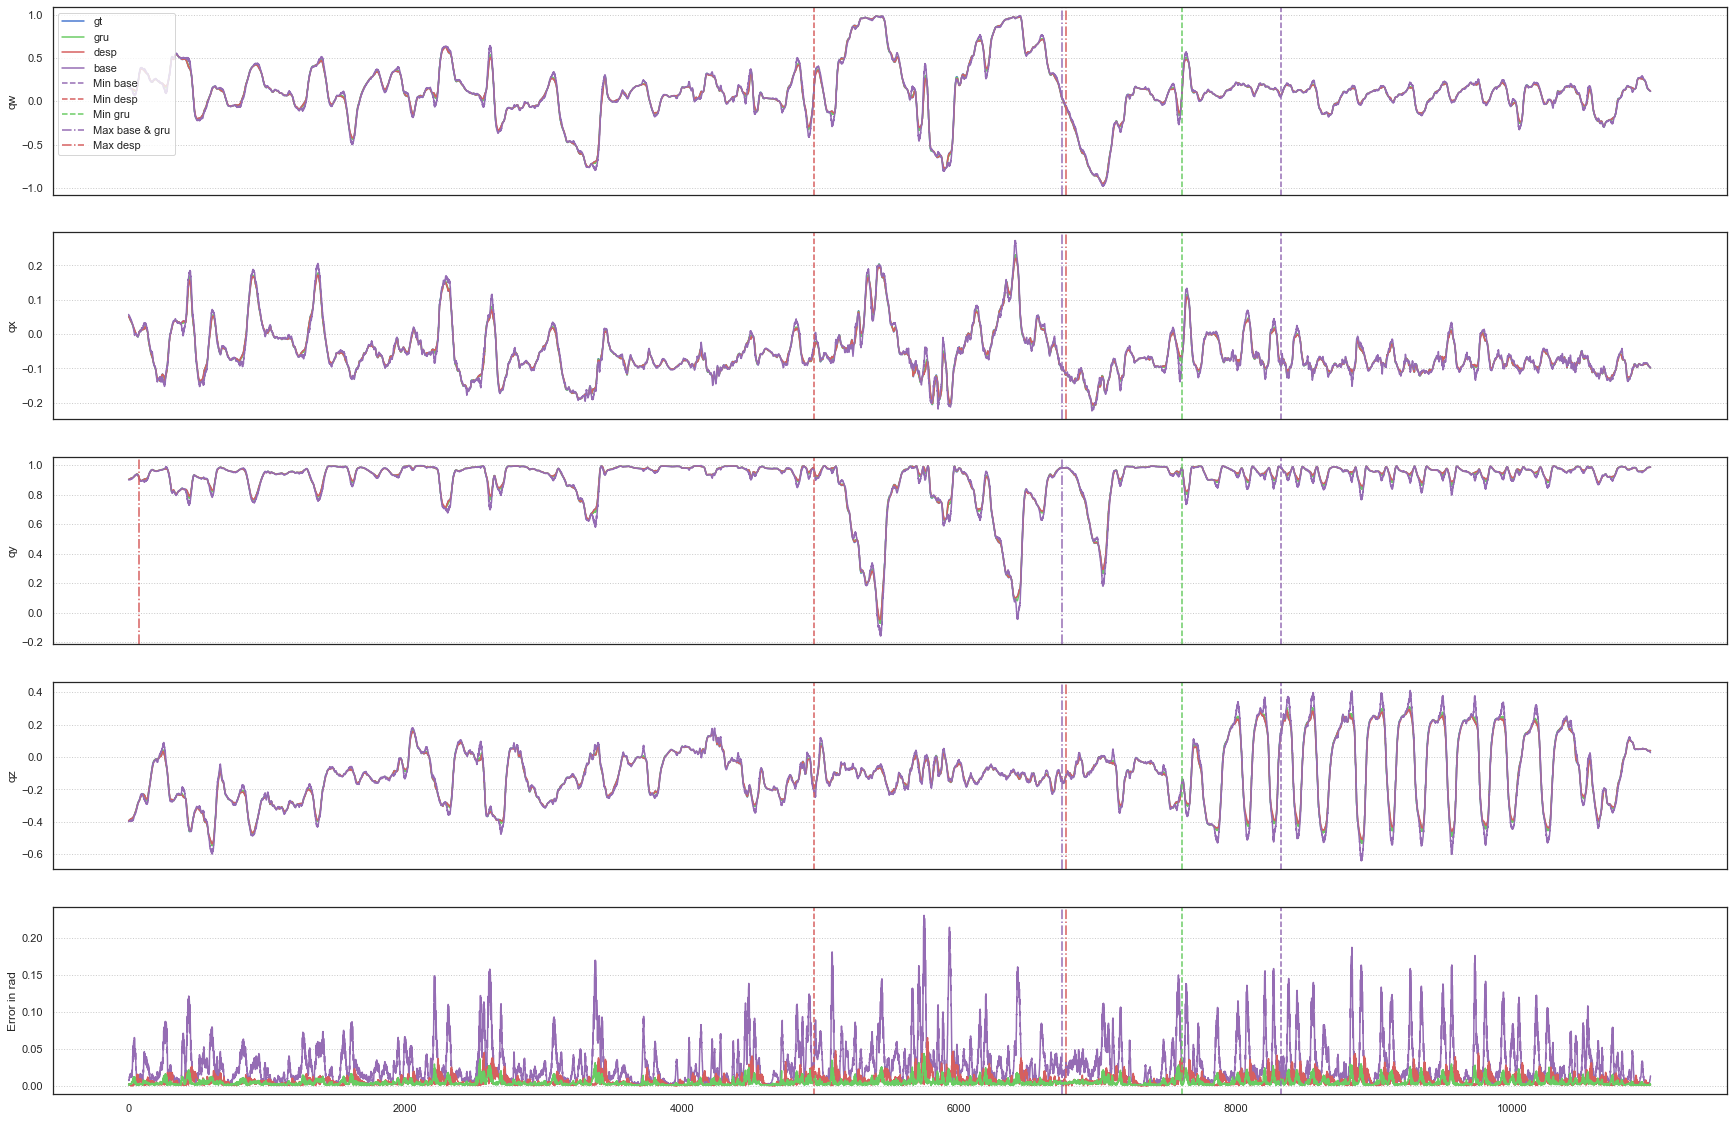

In [219]:
from pyquaternion import Quaternion

# define Look Ahead Time (LAT)
LAT_in_rows = cfg['LAT_in_rows'] 

sns.set(style="white", palette="muted", color_codes=True)
#rs = np.random.RandomState(10)

time_interval_start = 1000
time_interval_end = 12000

##########################################################################################################
# get traces
##########################################################################################################

path = Path_dataset01_data
gru = Path_results_dataset01_GRU_quat + "/7_2409_v01" + "/Traces"    
desp = Path_results_dataset01_DESP + "/8_2209_v01" + "/Traces"
base = Path_results_dataset01_Baseline_quat + "/Traces"
 

gru_list = []
desp_list = []
base_list = []


for csv in get_csv_files(path, "2*full_cont"):
        print(csv)
        df = pd.read_csv(csv)
        df = df[1:]
        df = df[time_interval_start:time_interval_end]
        #ts = len(df)
        ts = np.arange(0, df.shape[0])
        print(len(ts))
        df.columns = cfg['pos_coords']  + cfg['quat_coords']

# Generate a random univariate dataset
for data in get_csv_files(gru, "*2*rot"):
            print(data)        
            gru = pd.read_csv(data)
            gru = gru[time_interval_start:time_interval_end]
            gru.columns = cfg['quat_coords_pred']  + cfg['quat_coords_true']
            #gru_list.append(gru)
            #print(gru)
            
# Generate a random univariate dataset
for data in get_csv_files(desp, "2*quat"):
            print(data)        
            desp = pd.read_csv(data)
            desp = desp[time_interval_start:time_interval_end]
            desp.columns = cfg['quat_coords_pred']  + cfg['quat_coords_true']
            #desp = desp.to_numpy()
            #print(desp)
            #desp_list.append(desp)

# Generate a random univariate dataset
for data in get_csv_files(base, "2*_delta_rot"):
            print(data)        
            base = pd.read_csv(data)
            base = base[time_interval_start:time_interval_end]
            base.columns = cfg['quat_coords_pred']  + cfg['quat_coords_true']
            #base = base['ang_dists'].to_numpy()
            #base_list.append(base)
            

##########################################################################################################
##########################################################################################################

gru_seq1 = gru[['qw_pred']].to_numpy()
gru_seq2 = gru[['qx_pred']].to_numpy()
gru_seq3 = gru[['qy_pred']].to_numpy()
gru_seq4 = gru[['qz_pred']].to_numpy()

desp_seq1 = desp[['qw_pred']].to_numpy()
desp_seq2 = desp[['qx_pred']].to_numpy()
desp_seq3 = desp[['qy_pred']].to_numpy()
desp_seq4 = desp[['qz_pred']].to_numpy()

base_seq1 = base[['qw_pred']].to_numpy()
base_seq2 = base[['qx_pred']].to_numpy()
base_seq3 = base[['qy_pred']].to_numpy()
base_seq4 = base[['qz_pred']].to_numpy()

gt_seq1 = df[['qw']].to_numpy()
gt_seq2 = df[['qx']].to_numpy()
gt_seq3 = df[['qy']].to_numpy()
gt_seq4 = df[['qz']].to_numpy()

# horizontally stack columns
dataset_gru = np.hstack((gru_seq1, gru_seq2, gru_seq3, gru_seq4))
dataset_gt = np.hstack((gt_seq1, gt_seq2, gt_seq3, gt_seq4))
dataset_desp = np.hstack((desp_seq1, desp_seq2, desp_seq3, desp_seq4))
dataset_base = np.hstack((base_seq1, base_seq2, base_seq3, base_seq4))


# quaternion velocities
dataset_gru_q = ([Quaternion(q) for q in dataset_gru])
dataset_gt_q = ([Quaternion(q) for q in dataset_gt])
rotation_gru = np.array([(q1*q2).elements for q1, q2 in zip(dataset_gru_q,dataset_gt_q)])
rotation_gru = pd.DataFrame(rotation_gru)
rotation_gru.columns = cfg['quat_coords_pred']

dataset_desp_q = ([Quaternion(q) for q in dataset_desp])
dataset_gt_q = ([Quaternion(q) for q in dataset_gt])
rotation_desp = np.array([(q1*q2).elements for q1, q2 in zip(dataset_desp_q,dataset_gt_q)])
rotation_desp = pd.DataFrame(rotation_desp)
rotation_desp.columns = cfg['quat_coords_pred']

dataset_base_q = ([Quaternion(q) for q in dataset_base])
dataset_gt_q = ([Quaternion(q) for q in dataset_gt])
rotation_base = np.array([(q1*q2).elements for q1, q2 in zip(dataset_base_q,dataset_gt_q)])
rotation_base = pd.DataFrame(rotation_base)
rotation_base.columns = cfg['quat_coords_pred']



##########################################################################################################
# get error data
##########################################################################################################

path = Path_dataset01_data
gru = Path_results_dataset01_GRU_quat + "/7_2409_v01" + "/Evaluation"    
desp = Path_results_dataset01_DESP + "/8_2209_v01" + "/Evaluation"
base = Path_results_dataset01_Baseline_quat + "/Evaluation"
 

gru_list = []
desp_list = []
base_list = []


# Generate a random univariate dataset
for data in get_csv_files(gru, "*2*rot*dists"):
            print(data)        
            gru_error = pd.read_csv(data)
            gru_error = gru_error[time_interval_start:time_interval_end]
            gru_error.columns = ['ang_dists', 'euc_dists']
            gru_error = gru_error['ang_dists'].to_numpy()
            gru_list.append(gru_error)
            
# Generate a random univariate dataset
for data in get_csv_files(desp, "2*delta*quat*dists"):
            print(data)        
            desp_error = pd.read_csv(data)
            desp_error = desp_error[time_interval_start:time_interval_end]
            desp_error.columns = ['euc_dists']
            desp_error = desp_error.to_numpy()
            #print(desp)
            desp_list.append(desp_error)

# Generate a random univariate dataset
for data in get_csv_files(base, "2*delta_rot_dists"):
            print(data)        
            base_error = pd.read_csv(data)
            base_error = base_error[time_interval_start:time_interval_end]
            base_error.columns = ['ang_dists', 'euc_dists']
            base_error = base_error['ang_dists'].to_numpy()
            base_list.append(base_error)
            


##########################################################################################################



fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(30, 20), sharex=True)

# Plot position
ax1.plot(ts, df['qw'], label='gt', c = 'b')
ax1.plot(ts, rotation_gru['qw_pred'], label='gru', color = 'g')
ax1.plot(ts, rotation_desp['qw_pred'], label='desp',color =  'r')
ax1.plot(ts, rotation_base['qw_pred'], label='base', color = 'm')
ax1.set_ylabel('qw')
##ax1.set_xlim(0, 60)
ax1.legend(loc='upper left')
ax1.yaxis.grid(which='major', linestyle='dotted', linewidth=1)
#ax1.xaxis.set_major_locator(MultipleLocator(10))


# Plot position
ax2.plot(ts, df['qx'], label='qt', c = 'b')
ax2.plot(ts, rotation_gru['qx_pred'], label='gru', color = 'g')
ax2.plot(ts, rotation_desp['qx_pred'], label='desp',color =  'r')
ax2.plot(ts, rotation_base['qx_pred'], label='base', color = 'm')
ax2.set_ylabel('qx')
##ax1.set_xlim(0, 60)
#ax2.legend(loc='upper left')
ax2.yaxis.grid(which='major', linestyle='dotted', linewidth=1)
#ax1.xaxis.set_major_locator(MultipleLocator(10))


# Plot position
ax3.plot(ts, df['qy'], label='qt', c = 'b')
ax3.plot(ts, rotation_gru['qy_pred'], label='gru', color = 'g')
ax3.plot(ts, rotation_desp['qy_pred'], label='desp',color =  'r')
ax3.plot(ts, rotation_base['qy_pred'], label='base', color = 'm')
ax3.set_ylabel('qy')
##ax1.set_xlim(0, 60)
#ax3.legend(loc='upper left')
ax3.yaxis.grid(which='major', linestyle='dotted', linewidth=1)
#ax1.xaxis.set_major_locator(MultipleLocator(10))


# Plot position
ax4.plot(ts, df['qz'], label='qt', c = 'b')
ax4.plot(ts, rotation_gru['qz_pred'], label='gru', color = 'g')
ax4.plot(ts, rotation_desp['qz_pred'], label='desp',color =  'r')
ax4.plot(ts, rotation_base['qz_pred'], label='base', color = 'm')
ax4.set_ylabel('qz')
##ax1.set_xlim(0, 60)
#ax4.legend(loc='upper left')
ax4.yaxis.grid(which='major', linestyle='dotted', linewidth=1)
#ax1.xaxis.set_major_locator(MultipleLocator(10))


# Plot orientation
ax5.plot(base_list[0] , 'm' , label = "base")
ax5.plot(desp_list[0], 'r' , label = "desp")
ax5.plot(gru_list[0], 'g' , label = "gru")
#ax5.legend(loc='upper left')
ax5.set_ylabel('Error in rad')
ax5.yaxis.grid(which='major', linestyle='dotted', linewidth=1)


#Min values
ax1.axvline(8327, label = 'Min base', color='m' , linestyle = '--')
ax1.axvline(4952, label = 'Min desp', color='r', linestyle = '--')
ax1.axvline(7614, label = 'Min gru', color='g', linestyle = '--')

ax2.axvline(8327, label = 'Min base', color='m' , linestyle = '--')
ax2.axvline(4952, label = 'Min desp', color='r', linestyle = '--')
ax2.axvline(7614, label = 'Min gru', color='g', linestyle = '--')

ax3.axvline(8327, label = 'Min base', color='m' , linestyle = '--')
ax3.axvline(4952, label = 'Min desp',color='r', linestyle = '--')
ax3.axvline(7614, label = 'Min gru', color='g', linestyle = '--')

ax4.axvline(8327, label = 'Min base', color='m' , linestyle = '--')
ax4.axvline(4952, label = 'Min desp',color='r', linestyle = '--')
ax4.axvline(7614, label = 'Min gru', color='g', linestyle = '--')

ax5.axvline(8327, label = 'Min base', color='m' , linestyle = '--')
ax5.axvline(4952, label = 'Min desp',color='r', linestyle = '--')
ax5.axvline(7614, label = 'Min gru', color='g', linestyle = '--')


#Max values
ax1.axvline(6749,  label = 'Max base & gru', color='m' , linestyle = '-.')
ax1.axvline(6774, label = 'Max desp',color='r', linestyle = '-.')

ax2.axvline(6749,  label = 'Max base & gru', color='m' , linestyle = '-.')
ax2.axvline(6774, label = 'Max desp',color='r', linestyle = '-.')

ax3.axvline(6749,  label = 'Max base & gru', color='m' , linestyle = '-.')
ax3.axvline(74, label = 'Max desp',color='r', linestyle = '-.')

ax4.axvline(6749,  label = 'Max base & gru', color='m' , linestyle = '-.')
ax4.axvline(6774, label = 'Max desp',color='r', linestyle = '-.')

ax5.axvline(6749,   label = 'Max base & gru', color='m' , linestyle = '-.')
ax5.axvline(6774, label = 'Max desp',color='r', linestyle = '-.')

ax1.legend(loc='upper left')




dest = os.path.join(Path_figures_dataset01 + "/Error", "overview_min_max_rot.png")
plt.savefig(dest)

C:/Users/Thomas Weikert/Documents/Thesis/Project_V07_24092021/Data/01_Dataset\2_full_continious.csv
11000
C:/Users/Thomas Weikert/Documents/Thesis/Project_V07_24092021/Results/01_Dataset/GRU_pos//7_2409_v01/Traces\2_full_continious_result_delta_pos.csv
C:/Users/Thomas Weikert/Documents/Thesis/Project_V07_24092021/Results/01_Dataset/DESP//8_2209_v01/Traces\2_full_continious_result_pos_DESP.csv
C:/Users/Thomas Weikert/Documents/Thesis/Project_V07_24092021/Results/01_Dataset/Baseline_pos//Traces\2_full_continious_result_pos.csv
C:/Users/Thomas Weikert/Documents/Thesis/Project_V07_24092021/Results/01_Dataset/GRU_pos//7_2409_v01/Evaluation\2_full_continious_result_delta_pos_dists.csv
C:/Users/Thomas Weikert/Documents/Thesis/Project_V07_24092021/Results/01_Dataset/DESP//8_2209_v01/Evaluation\2_full_continious_pos_dists.csv
C:/Users/Thomas Weikert/Documents/Thesis/Project_V07_24092021/Results/01_Dataset/Baseline_pos//Evaluation\2_full_continious_result_pos_dists.csv


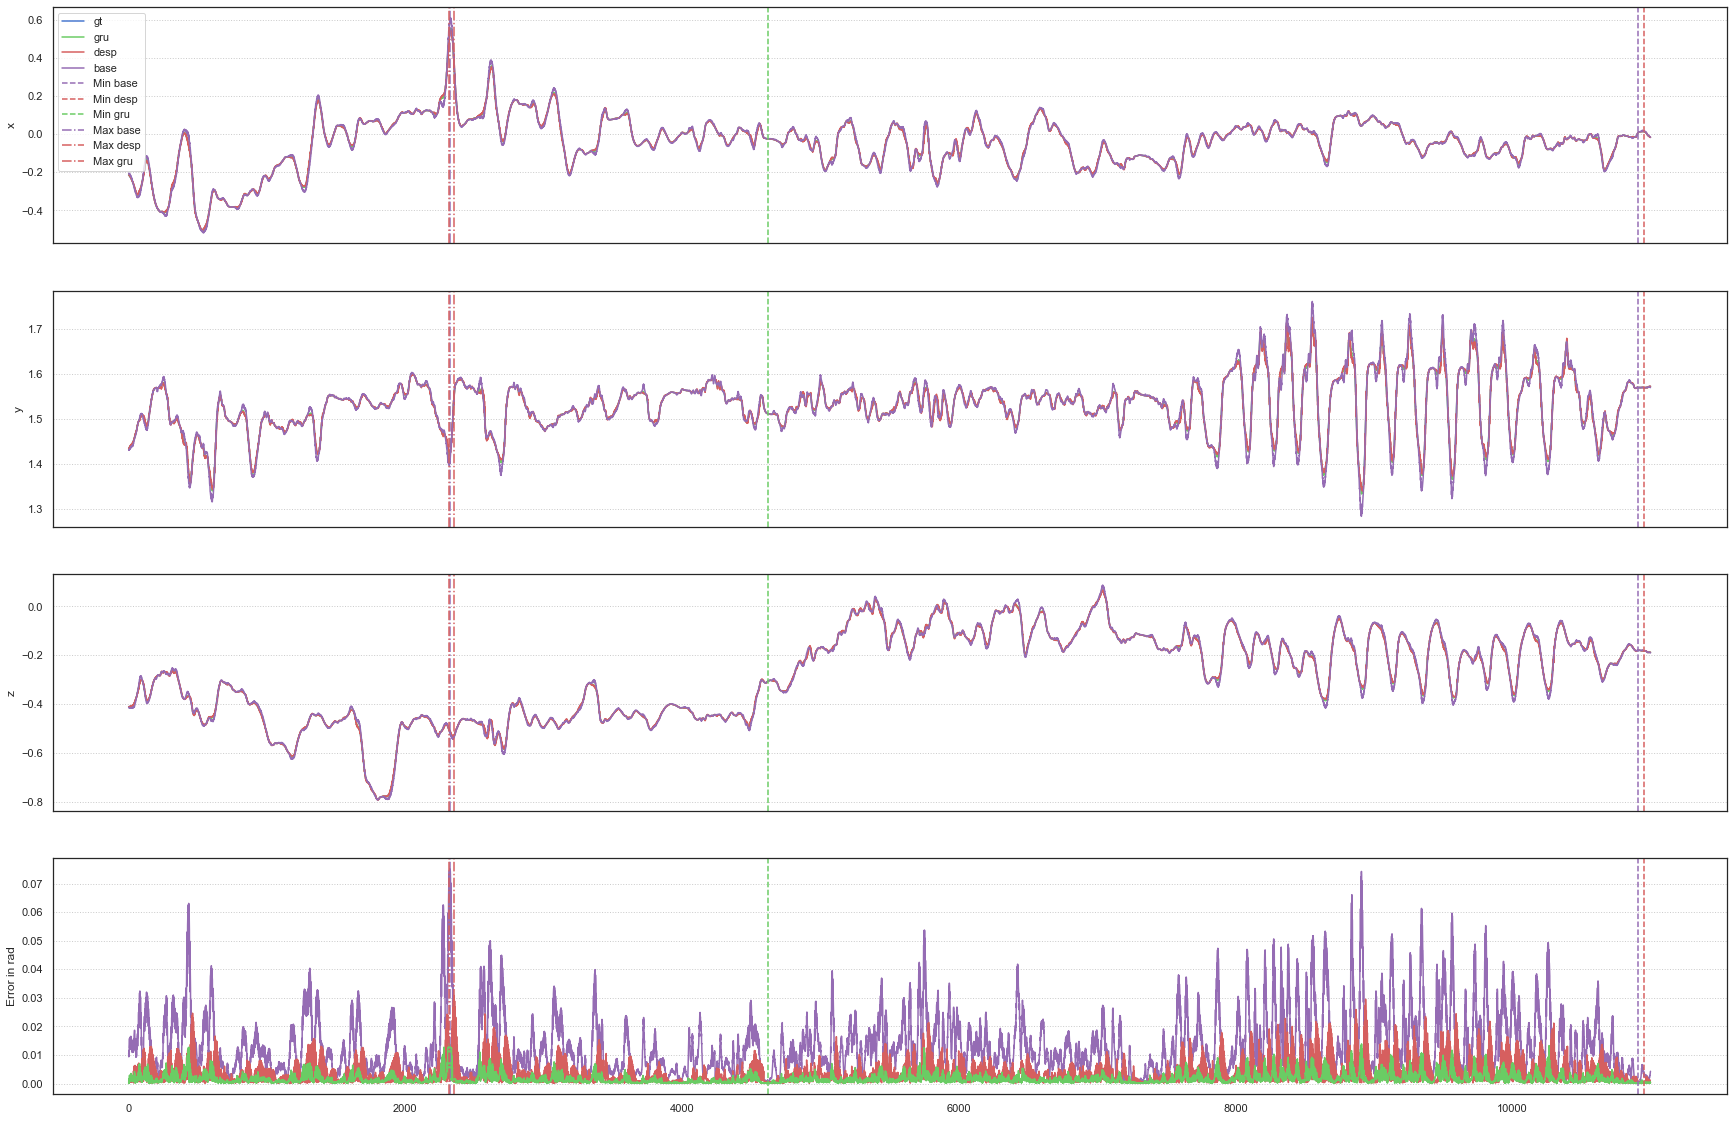

In [214]:
##########################################################################################################
# get traces for all models  + error POSITION
##########################################################################################################
# define Look Ahead Time (LAT)
LAT_in_rows = cfg['LAT_in_rows'] 

sns.set(style="white", palette="muted", color_codes=True)
#rs = np.random.RandomState(10)

time_interval_start =1000
time_interval_end = 12000

##########################################################################################################
# get traces
##########################################################################################################

path = Path_dataset01_data
gru = Path_results_dataset01_GRU_pos + "/7_2409_v01" + "/Traces"
desp = Path_results_dataset01_DESP + "/8_2209_v01" + "/Traces"
base = Path_results_dataset01_Baseline_pos + "/Traces"
 

gru_list = []
desp_list = []
base_list = []


for csv in get_csv_files(path, "2*full_cont"):
        print(csv)
        df = pd.read_csv(csv)
        df = df[time_interval_start:time_interval_end]
        #ts = len(df)
        ts = np.arange(0, df.shape[0])
        print(len(ts))
        df.columns = cfg['pos_coords']  + cfg['quat_coords']

# Generate a random univariate dataset
for data in get_csv_files(gru, "*2*delta*pos"):
            print(data)        
            gru = pd.read_csv(data)
            gru = gru[time_interval_start:time_interval_end]
            gru.columns = cfg['pos_coords_pred']  + cfg['pos_coords_true']
            #gru_list.append(gru)
            #print(gru)
            
# Generate a random univariate dataset
for data in get_csv_files(desp, "2*pos"):
            print(data)        
            desp = pd.read_csv(data)
            desp = desp[time_interval_start:time_interval_end]
            desp.columns = cfg['pos_coords_pred']  + cfg['pos_coords_true']
            #desp = desp.to_numpy()
            #print(desp)
            #desp_list.append(desp)

# Generate a random univariate dataset
for data in get_csv_files(base, "2*result*pos"):
            print(data)        
            base = pd.read_csv(data)
            base = base[time_interval_start:time_interval_end]
            base.columns = cfg['pos_coords_pred']  + cfg['pos_coords_true']
            #base = base['ang_dists'].to_numpy()
            #base_list.append(base)
            

##########################################################################################################
##########################################################################################################

gru_seq1 = gru[['x_pred']].to_numpy()
gru_seq2 = gru[['y_pred']].to_numpy()
gru_seq3 = gru[['z_pred']].to_numpy()

desp_seq1 = desp[['x_pred']].to_numpy()
desp_seq2 = desp[['y_pred']].to_numpy()
desp_seq3 = desp[['z_pred']].to_numpy()

base_seq1 = base[['x_pred']].to_numpy()
base_seq2 = base[['y_pred']].to_numpy()
base_seq3 = base[['z_pred']].to_numpy()

gt_seq1 = df[['x']].to_numpy()
gt_seq2 = df[['y']].to_numpy()
gt_seq3 = df[['z']].to_numpy()

# horizontally stack columns
dataset_gru = np.hstack((gru_seq1, gru_seq2, gru_seq3))
dataset_gt = np.hstack((gt_seq1, gt_seq2, gt_seq3))
dataset_desp = np.hstack((desp_seq1, desp_seq2, desp_seq3))
dataset_base = np.hstack((base_seq1, base_seq2, base_seq3))


#  
rotation_gru = np.array([(q1+q2) for q1, q2 in zip(dataset_gru,dataset_gt)])
rotation_gru = pd.DataFrame(rotation_gru)
rotation_gru.columns = cfg['pos_coords_pred']

rotation_desp = np.array([(q1+q2) for q1, q2 in zip(dataset_desp,dataset_gt)])
rotation_desp = pd.DataFrame(rotation_desp)
rotation_desp.columns = cfg['pos_coords_pred']

rotation_base = np.array([(q1+q2) for q1, q2 in zip(dataset_base,dataset_gt)])
rotation_base = pd.DataFrame(rotation_base)
rotation_base.columns = cfg['pos_coords_pred']



##########################################################################################################
# get error data
##########################################################################################################

path = Path_dataset01_data
gru = Path_results_dataset01_GRU_pos + "/7_2409_v01" + "/Evaluation"
desp = Path_results_dataset01_DESP + "/8_2209_v01" + "/Evaluation"
base = Path_results_dataset01_Baseline_pos + "/Evaluation"
 

gru_list = []
desp_list = []
base_list = []


# Generate a random univariate dataset
for data in get_csv_files(gru, "*2*delta*pos*dists"):
            print(data)        
            gru_error = pd.read_csv(data)
            gru_error = gru_error[time_interval_start:time_interval_end]
            gru_error.columns = ['euc_dists']
            gru_error = gru_error.to_numpy()
            gru_list.append(gru_error)
            
# Generate a random univariate dataset
for data in get_csv_files(desp, "2*pos*dists"):
            print(data)        
            desp_error = pd.read_csv(data)
            desp_error = desp_error[time_interval_start:time_interval_end]
            desp_error.columns = ['euc_dists']
            desp_error = desp_error.to_numpy()
            #print(desp)
            desp_list.append(desp_error)

# Generate a random univariate dataset
for data in get_csv_files(base, "2*pos*dists"):
            print(data)        
            base_error = pd.read_csv(data)
            base_error = base_error[time_interval_start:time_interval_end]
            base_error.columns = ['euc_dists']
            base_error = base_error.to_numpy()
            base_list.append(base_error)
            


##########################################################################################################



fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(30, 20), sharex=True)

# Plot position
ax1.plot(ts, df['x'], label='gt', c = 'b')
ax1.plot(ts, rotation_gru['x_pred'], label='gru', color = 'g')
ax1.plot(ts, rotation_desp['x_pred'], label='desp',color =  'r')
ax1.plot(ts, rotation_base['x_pred'], label='base', color = 'm')
ax1.set_ylabel('x')
##ax1.set_xlim(0, 60)
ax1.yaxis.grid(which='major', linestyle='dotted', linewidth=1)
#ax1.xaxis.set_major_locator(MultipleLocator(10))


# Plot position
ax2.plot(ts, df['y'], label='qt', c = 'b')
ax2.plot(ts, rotation_gru['y_pred'], label='gru', color = 'g')
ax2.plot(ts, rotation_desp['y_pred'], label='desp',color =  'r')
ax2.plot(ts, rotation_base['y_pred'], label='base', color = 'm')
ax2.set_ylabel('y')
##ax1.set_xlim(0, 60)
ax2.yaxis.grid(which='major', linestyle='dotted', linewidth=1)
#ax1.xaxis.set_major_locator(MultipleLocator(10))


# Plot position
ax3.plot(ts, df['z'], label='qt', c = 'b')
ax3.plot(ts, rotation_gru['z_pred'], label='gru', color = 'g')
ax3.plot(ts, rotation_desp['z_pred'], label='desp',color =  'r')
ax3.plot(ts, rotation_base['z_pred'], label='base', color = 'm')
ax3.set_ylabel('z')
##ax1.set_xlim(0, 60)
ax3.yaxis.grid(which='major', linestyle='dotted', linewidth=1)
#ax1.xaxis.set_major_locator(MultipleLocator(10))



# Plot orientation
ax4.plot(base_list[0] , 'b' , label = "base", color = 'm')
ax4.plot(desp_list[0], 'r' , label = "desp",color =  'r')
ax4.plot(gru_list[0], 'g' , label = "gru", color = 'g')
ax4.set_ylabel('Error in rad')
ax4.yaxis.grid(which='major', linestyle='dotted', linewidth=1)

#Min values
ax1.axvline(10911, label = 'Min base', color='m' , linestyle = '--')
ax1.axvline(10949, label = 'Min desp', color='r', linestyle = '--')
ax1.axvline(4623, label = 'Min gru', color='g', linestyle = '--')

ax2.axvline(10911, label = 'Min base', color='m' , linestyle = '--')
ax2.axvline(10949, label = 'Min desp', color='r', linestyle = '--')
ax2.axvline(4623, label = 'Min gru', color='g', linestyle = '--')

ax3.axvline(10911, label = 'Min base', color='m' , linestyle = '--')
ax3.axvline(10949, label = 'Min desp',color='r', linestyle = '--')
ax3.axvline(4623, label = 'Min gru', color='g', linestyle = '--')

ax4.axvline(10911, label = 'Min base', color='m' , linestyle = '--')
ax4.axvline(10949, label = 'Min desp',color='r', linestyle = '--')
ax4.axvline(4623, label = 'Min gru', color='g', linestyle = '--')


#Max values
ax1.axvline(2321,  label = 'Max base', color='m' , linestyle = '-.')
ax1.axvline(2352, label = 'Max desp',color='r', linestyle = '-.')
ax1.axvline(2318, label = 'Max gru',color='r', linestyle = '-.')

ax2.axvline(2321,  label = 'Max base', color='m' , linestyle = '-.')
ax2.axvline(2352, label = 'Max desp',color='r', linestyle = '-.')
ax2.axvline(2318, label = 'Max gru',color='r', linestyle = '-.')

ax3.axvline(2321,  label = 'Max base', color='m' , linestyle = '-.')
ax3.axvline(2352, label = 'Max desp',color='r', linestyle = '-.')
ax3.axvline(2318, label = 'Max gru',color='r', linestyle = '-.')

ax4.axvline(2321,  label = 'Max base', color='m' , linestyle = '-.')
ax4.axvline(2352, label = 'Max desp',color='r', linestyle = '-.')
ax4.axvline(2318, label = 'Max gru',color='r', linestyle = '-.')


ax1.legend(loc='upper left')



dest = os.path.join(Path_figures_dataset01 + "/Error", "overview_min_max_pos.png")
plt.savefig(dest)

In [136]:
##########################################################################################################
# get max min data ROTATION
##########################################################################################################

path = Path_dataset01_data
gru = Path_results_dataset01_GRU_quat + "/7_2409_v01" + "/Evaluation"    
desp = Path_results_dataset01_DESP + "/8_2209_v01" + "/Evaluation"
base = Path_results_dataset01_Baseline_quat + "/Evaluation"
 

gru_list = []
desp_list = []
base_list = []


# Generate a random univariate dataset
for data in get_csv_files(gru, "*2*rot*dists"):
            print(data)        
            gru_error = pd.read_csv(data)
            gru_error = gru_error[time_interval_start:time_interval_end]
            gru_error.columns = ['gru rot', 'euc_dists']
            #gru_error = gru_error['ang_dists']
            #gru_error = gru_error['ang_dists'].to_numpy()
            #gru_list.append(gru_error)
            
# Generate a random univariate dataset
for data in get_csv_files(desp, "2*delta*quat*dists"):
            print(data)        
            desp_error = pd.read_csv(data)
            desp_error = desp_error[time_interval_start:time_interval_end]
            desp_error.columns = ['desp rot']
            #desp_error = desp_error.to_numpy()
            #print(desp)
            #desp_list.append(desp_error)

# Generate a random univariate dataset
for data in get_csv_files(base, "2*delta_rot_dists"):
            print(data)        
            base_error = pd.read_csv(data)
            base_error = base_error[time_interval_start:time_interval_end]
            base_error.columns = ['base rot', 'euc_dists']
            #base_error = base_error['ang_dists']
            #base_error = base_error['ang_dists'].to_numpy()
            #base_list.append(base_error)
            
            
RawResults = gru_error.sort_values(by='gru rot', ascending=True) 
RawResults[:5]


C:/Users/Thomas Weikert/Documents/Thesis/Project_V07_24092021/Results/01_Dataset/GRU_quat//7_2409_v01/Evaluation\2_full_continious_result_rot_dists.csv
C:/Users/Thomas Weikert/Documents/Thesis/Project_V07_24092021/Results/01_Dataset/DESP//8_2209_v01/Evaluation\2_full_continious_delta_quat_dists.csv
C:/Users/Thomas Weikert/Documents/Thesis/Project_V07_24092021/Results/01_Dataset/Baseline_quat//Evaluation\2_full_continious_result_delta_rot_dists.csv


,gru rot,euc_dists
7614,0.000360,0.000361
11066,0.000499,0.000499
1855,0.000508,0.000508
5979,0.000546,0.000546
7096,0.000560,0.000560


In [206]:
##########################################################################################################
# get max min data Position
##########################################################################################################

##########################################################################################################
# get traces
##########################################################################################################

path = Path_dataset01_data
gru = Path_results_dataset01_GRU_pos + "/7_2409_v01" + "/Evaluation"
desp = Path_results_dataset01_DESP + "/8_2209_v01" + "/Evaluation"
base = Path_results_dataset01_Baseline_pos + "/Evaluation"
 


# Generate a random univariate dataset
for data in get_csv_files(gru, "*2*delta*pos*dists"):
            print(data)        
            gru_error = pd.read_csv(data)
            gru_error = gru_error[time_interval_start:time_interval_end]
            gru_error.columns = ['euc_dists']

            
# Generate a random univariate dataset
for data in get_csv_files(desp, "2*pos*dists"):
            print(data)        
            desp_error = pd.read_csv(data)
            desp_error = desp_error[time_interval_start:time_interval_end]
            desp_error.columns = ['euc_dists']


# Generate a random univariate dataset
for data in get_csv_files(base, "2*pos*dists"):
            print(data)        
            base_error = pd.read_csv(data)
            base_error = base_error[time_interval_start:time_interval_end]
            base_error.columns = ['euc_dists']
     

            
            
RawResults = gru_error.sort_values(by='euc_dists', ascending=True) 
RawResults[:5]



C:/Users/Thomas Weikert/Documents/Thesis/Project_V07_24092021/Results/01_Dataset/GRU_pos//7_2409_v01/Evaluation\2_full_continious_result_delta_pos_dists.csv
C:/Users/Thomas Weikert/Documents/Thesis/Project_V07_24092021/Results/01_Dataset/DESP//8_2209_v01/Evaluation\2_full_continious_pos_dists.csv
C:/Users/Thomas Weikert/Documents/Thesis/Project_V07_24092021/Results/01_Dataset/Baseline_pos//Evaluation\2_full_continious_result_pos_dists.csv


,euc_dists
5623,0.000018
11894,0.000020
4747,0.000026
4705,0.000029
11916,0.000036


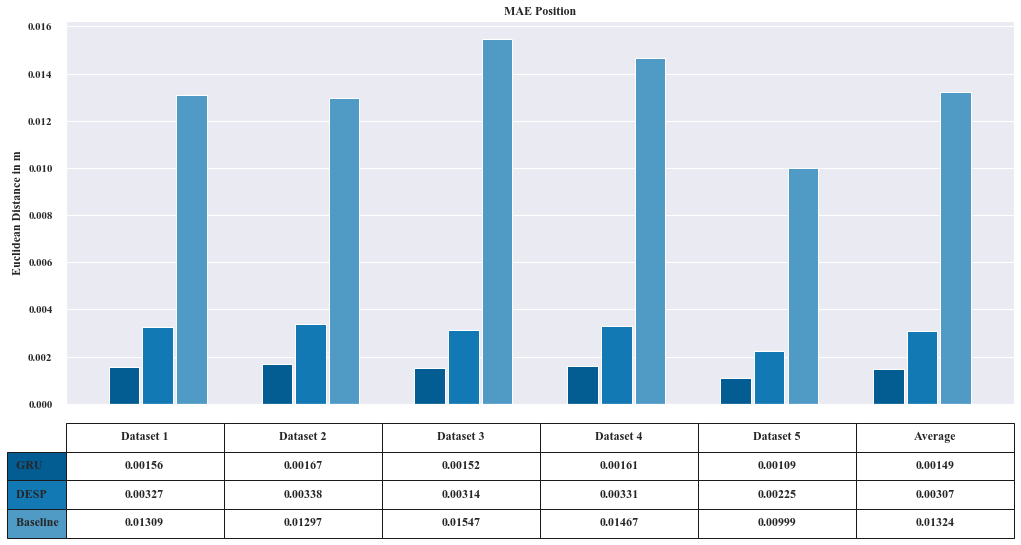

In [312]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
# Set styles
plt.style.use(['seaborn-paper', 'seaborn-whitegrid'])
plt.style.use(['seaborn'])
sns.set(palette='PuBu_r')
matplotlib.rc("font", family="Times New Roman", size=12)

labels = ['Dataset 1','Dataset 2','Dataset 3','Dataset 4','Dataset 5','Average']
GRU = [0.00156,0.00167,0.00152,0.00161,0.00109,0.00149]
DESP = [0.00327,0.00338,0.00314,0.00331,0.00225,0.00307]
Baseline = [0.01309,0.01297,0.01547,0.01467,0.00999,0.01324]
bar_width = 0.20
data = [GRU,DESP,Baseline]

colors = sns.color_palette(palette='PuBu_r')
columns = ('Dataset 1','Dataset 2','Dataset 3','Dataset 4','Dataset 5','Average')

index = np.arange(len(labels))
fig = plt.figure(figsize=(17,14))
plt.bar(index, GRU, bar_width)
plt.bar(index+ bar_width+.02, DESP, bar_width)
plt.bar(index+ 2*bar_width+.04, Baseline, bar_width)

plt.table(cellText=data,
          rowLabels=[' GRU ', ' DESP ', ' Baseline '],
          rowColours=colors,
          colLabels=columns,
          loc='bottom',
          cellLoc='center',
          bbox=[0, -.35, 1, 0.3])

fig.subplots_adjust(bottom=0.5)

plt.ylabel('Euclidean Distance in m')
plt.xticks([])
plt.title('MAE Position')




dest = os.path.join(Path_figures_dataset01 + "Result_datasets_pos.png")
plt.savefig(dest)
plt.show()

TypeError: join() got an unexpected keyword argument 'dpi'

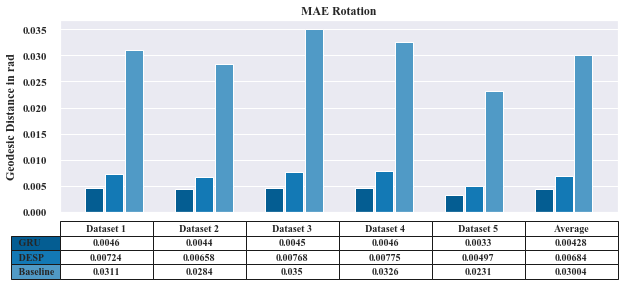

In [317]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
# Set styles
plt.style.use(['seaborn-paper', 'seaborn-whitegrid'])
plt.style.use(['seaborn'])
sns.set(palette='PuBu_r')
matplotlib.rc("font", family="Times New Roman", size=10)

labels = ['Dataset 1','Dataset 2','Dataset 3','Dataset 4','Dataset 5','Average']
GRU = [0.00460,0.00440,0.00450,0.00460,0.00330,0.00428]
DESP = [0.00724,0.00658,0.00768,0.00775,0.00497,0.00684]
Baseline = [0.03110,0.02840,0.03500,0.03260,0.02310,0.03004]
bar_width = 0.20
data = [GRU,DESP,Baseline]

colors = sns.color_palette(palette='PuBu_r')
columns = ('Dataset 1','Dataset 2','Dataset 3','Dataset 4','Dataset 5','Average')

index = np.arange(len(labels))
fig = plt.figure(figsize=(10,7))
plt.bar(index, GRU, bar_width)
plt.bar(index+ bar_width+.02, DESP, bar_width)
plt.bar(index+ 2*bar_width+.04, Baseline, bar_width)

plt.table(cellText=data,
          rowLabels=[' GRU ', ' DESP ', ' Baseline '],
          rowColours=colors,
          colLabels=columns,
          loc='bottom',
          cellLoc='center',
          bbox=[0, -.35, 1, 0.3])

fig.subplots_adjust(bottom=0.5)

plt.ylabel('Geodesic Distance in rad')
plt.xticks([])
plt.title('MAE Rotation')




dest = os.path.join(Path_figures_dataset01 + "Result_datasets_rot.png", dpi=500)
plt.savefig(dest)
plt.show()

In [7]:
from pyquaternion import Quaternion


gru_seq1 = gru[['qw_pred']].to_numpy()
gru_seq2 = gru[['qx_pred']].to_numpy()
gru_seq3 = gru[['qy_pred']].to_numpy()
gru_seq4 = gru[['qz_pred']].to_numpy()

base_seq1 = df[['qw']].to_numpy()
base_seq2 = df[['qx']].to_numpy()
base_seq3 = df[['qy']].to_numpy()
base_seq4 = df[['qz']].to_numpy()

# horizontally stack columns
dataset_gru = np.hstack((gru_seq1, gru_seq2, gru_seq3, gru_seq4))
dataset_base = np.hstack((base_seq1, base_seq2, base_seq3, base_seq4))

# get delta's
dataset_gru_q = ([Quaternion(q) for q in dataset_gru])
dataset_base_q = ([Quaternion(q) for q in dataset_base])

rotation_gru = np.array([(q_gru*q_base) for q_gru, q_base in zip(dataset_gru,dataset_base)])

In [17]:
dataset_gru

array([[ 1.0008734e+00, -3.8401410e-04,  4.6387315e-05, -4.1431190e-04],
       [ 1.0007980e+00, -3.2858923e-04,  1.6654097e-04, -3.5133958e-04],
       [ 1.0008626e+00, -5.5360420e-04,  1.2500212e-05, -3.5592540e-04],
       ...,
       [ 1.0007735e+00,  8.5126610e-05,  2.4154224e-03,  6.0909986e-04],
       [ 1.0008119e+00,  1.3865903e-04,  2.4227537e-03,  5.8662890e-04],
       [ 1.0007901e+00,  1.6376004e-04,  2.6953742e-03,  4.8117340e-04]])

In [30]:
dataset_gt[100]

array([ 0.3725304 ,  0.01344104,  0.8990088 , -0.2298339 ])

In [29]:
q1 = Quaternion(dataset_gru[100])

q2 = Quaternion(dataset_gt[100])

e = q1*q2
e

Quaternion(0.37269860919031345, 0.013770363579577416, 0.8999373695490588, -0.22967168859236345)

In [20]:
i = e * q2 
i

Quaternion(1.000798, -0.0003285892300000093, 0.00016654096999999327, -0.00035133957999999854)

In [21]:
q1

Quaternion(1.0007979999999999, -0.00032858922999999996, 0.00016654097, -0.00035133958)

In [22]:
q2

Quaternion(0.157551, 0.05160009, 0.9040523000000001, -0.3939601)

In [38]:
########################################
# Plot error of each model for rot Traces  
########################################

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


sns.set(style="white", palette="muted", color_codes=True)
#rs = np.random.RandomState(10)

gru = Path_results_dataset01_GRU_quat + "/7_2409_v01" + "/Evaluation"
desp = Path_results_dataset01_DESP + "/8_2209_v01" + "/Evaluation"
base = Path_results_dataset01_Baseline_quat + "/Evaluation"
 

gru_list = []
desp_list = []
base_list = []


# Generate a random univariate dataset
for data in get_csv_files(gru, "delta*rot*dists*"):
            print(data)        
            gru = pd.read_csv(data)
            gru = gru[10000:13000]
            gru.columns = ['ang_dists', 'euc_dists']
            gru = gru['ang_dists'].to_numpy()
            gru_list.append(gru)
            
# Generate a random univariate dataset
for data in get_csv_files(desp, "2*delta*quat*dists"):
            print(data)        
            desp = pd.read_csv(data)
            desp = desp[10000:13000]
            desp.columns = ['euc_dists']
            desp = desp.to_numpy()
            #print(desp)
            desp_list.append(desp)

# Generate a random univariate dataset
for data in get_csv_files(base, "2*delta_rot_dists"):
            print(data)        
            base = pd.read_csv(data)
            base = base[10000:13000]
            base.columns = ['ang_dists', 'euc_dists']
            base = base['ang_dists'].to_numpy()
            base_list.append(base)
      
            
#Set up the matplotlib figure
#f, axes = plt.subplots(1, 3, figsize=(20, 10), sharex=True)
            
for i in range(len(gru_list)):
    # Plot a simple histogram with binsize determined automatically
    

    figure(figsize=(20, 10))
    
    #plt.set_xlabel('Trace')
    #plt.set_ylabel('Geodesic Distance')
    
    #sns.despine(left=True)
    plt.plot(base_list[i] , 'b' , label = "Baseline Rotation")
    
    plt.plot(desp_list[i], 'r' , label = "DESP Rotation")

    plt.plot(gru_list[i], 'g' , label = "GRU Rotation")

    
    plt.setp(axes, yticks=[])
    plt.tight_layout()
    plt.legend()
    
    dest = os.path.join(Path_figures_dataset01 + "/Error", "{}_rot_error.pdf".format(i+1))
    #dest = os.path.join(Path_figures_dataset01 + "/Error", "error.pdf")
    plt.savefig(dest)
    plt.clf() 

C:/Users/Thomas Weikert/Documents/Thesis/Project_V07_24092021/Results/01_Dataset/DESP//8_2209_v01/Evaluation\2_full_continious_delta_quat_dists.csv
C:/Users/Thomas Weikert/Documents/Thesis/Project_V07_24092021/Results/01_Dataset/Baseline_quat//Evaluation\2_full_continious_result_delta_rot_dists.csv


In [514]:
########################################
# Plot prediction of each model for pos Traces  
########################################


def plot_prediction(original, base, desp, gru, figures_path):
    
    ########### Original Trace
    for csv in get_csv_files(original, "5_full_cont"):
        print(csv)
        #ts = np.arange(0, 60 + cfg['dt'], cfg['dt'])
        df_org = pd.read_csv(csv)
        df_org = df_org[8000:11000]
        df_org.columns = ["x","y","z","qw","qx","qy","qz"]
        #ts = len(df)
        ts_org = np.arange(0, df_org.shape[0])
        
        #print(df)
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 8), sharex=True)

    ########### base prediction
    for csv in get_csv_files(base, "5_full_cont"):
        print(csv)
        #ts = np.arange(0, 60 + cfg['dt'], cfg['dt'])
        base = pd.read_csv(csv)
        base = base[8000:11000]
        #ts = len(df)
        ts_base = np.arange(0, base.shape[0])
        base.columns = cfg['pos_coords_pred']  + cfg['pos_coords_true']
        
    ########### desp prediction
    for csv in get_csv_files(desp, "5_full_cont*pos"):
        print(csv)
        #ts = np.arange(0, 60 + cfg['dt'], cfg['dt'])
        desp = pd.read_csv(csv)
        desp = desp[8000:11000]
        #ts = len(df)
        ts_desp = np.arange(0, desp.shape[0])
        desp.columns = cfg['pos_coords_pred']  + cfg['pos_coords_true']
        
        
    ########### gru prediction
    for csv in get_csv_files(gru, "5_full_cont*pos*abs"):
        print(csv)
        #ts = np.arange(0, 60 + cfg['dt'], cfg['dt'])
        gru = pd.read_csv(csv)
        gru = gru[8000:11000]
        #ts = len(df)
        ts_gru = np.arange(0, gru.shape[0])
        gru.columns = cfg['pos_coords_pred']  + cfg['pos_coords_true']
        
        
    # Plot orignal
    ax1.plot(ts_org, df_org['x'], label='x org')
    ax1.plot(ts_org, df_org['y'], label='y org', linestyle='--')
    ax1.plot(ts_org, df_org['z'], label='z org', linestyle='-.')

    ax1.plot(ts_base, base['x_pred'], label='x base')
    ax1.plot(ts_base, base['y_pred'], label='y base', linestyle='--')
    ax1.plot(ts_base, base['z_pred'], label='z base', linestyle='-.')

    ax1.plot(ts_desp, desp['x_pred'], label='x DESP')
    ax1.plot(ts_desp, desp['y_pred'], label='y DESP', linestyle='--')
    ax1.plot(ts_desp, desp['z_pred'], label='z DESP', linestyle='-.')

    ax1.plot(ts_gru, gru['x_pred'], label='x gru')
    ax1.plot(ts_gru, gru['y_pred'], label='y gru', linestyle='--')
    ax1.plot(ts_gru, gru['z_pred'], label='z gru', linestyle='-.')


    ax1.set_ylabel('Prediction')
    #ax1.set_xlim(0, 60)
    ax1.legend(loc='upper left')
    #ax1.yaxis.grid(which='major', linestyle='dotted', linewidth=1)
    #ax1.xaxis.set_major_locator(MultipleLocator(10))

    # Plot continious
    #ax2.plot(ts, df['qw'], label='qw')
    #ax2.plot(ts, df['qx'], label='qx', linestyle='--')
    #ax2.plot(ts, df['qy'], label='qy', linestyle='-.')
    #ax2.plot(ts, df['qz'], label='qz', linestyle='--')
    ax2.set_xlabel('frames')
    ax2.set_ylabel('Continious frames')
    #ax2.set_xlim(0, 60)
    ax2.legend(loc='upper left')
    #ax2.yaxis.grid(which='major', linestyle='dotted', linewidth=1)
    #ax2.xaxis.set_major_locator(MultipleLocator(10))

    #trace_id = os.path.splitext(os.path.basename(csv))[0]
    dest = os.path.join(figures_path, "Prediction_pos.pdf")
    fig.savefig(dest)
    logging.info("Plotting trace {} and saving to file {}".format(csv, dest))
    #fig.clf()
        


C:/Users/weikert1/Documents/Thesis/Project_V07_24092021/Data/01_Dataset\5_full_continious.csv
C:/Users/weikert1/Documents/Thesis/Project_V07_24092021/Results/01_Dataset/Baseline_pos//Traces\5_full_continious_result_pos.csv
C:/Users/weikert1/Documents/Thesis/Project_V07_24092021/Results/01_Dataset/DESP/8_2209_v01/Traces\5_full_continious_result_pos_DESP.csv
C:/Users/weikert1/Documents/Thesis/Project_V07_24092021/Results/01_Dataset/GRU_pos/7_2409_v01/Traces\5_full_continious_result_pos_abs.csv


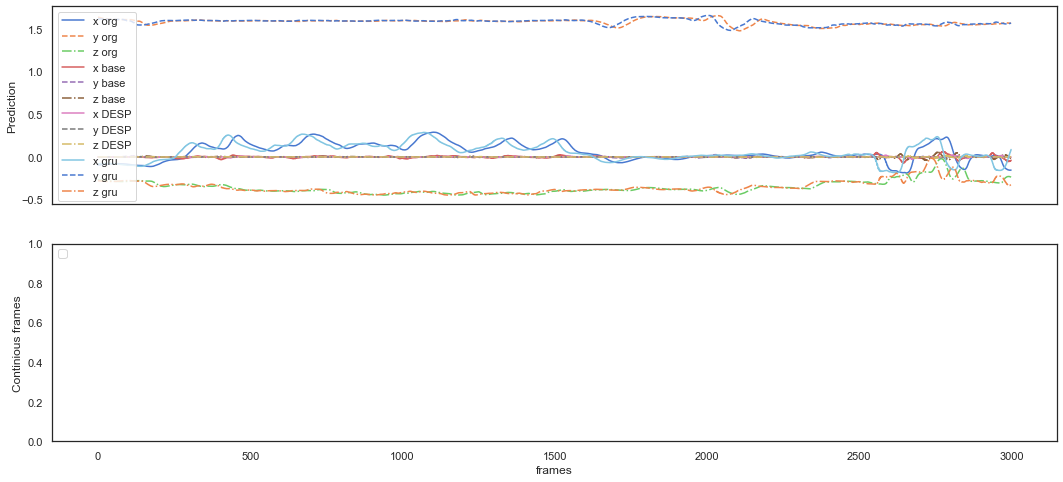

In [515]:
original_trace = Path_dataset01_data
base_pos = Path_results_dataset01_Baseline_pos + "/Traces"
desp_pos = Path_results_dataset01_DESP + "8_2209_v01/Traces"
gru_pos = Path_results_dataset01_GRU_pos + "7_2409_v01/Traces"
figure = Path_figures_dataset01

plot_prediction(original_trace, base_pos,desp_pos,gru_pos,figure )

C:/Users/weikert1/Documents/Thesis/Project_V07_24092021/Data/01_Dataset\5_full_continious.csv
19960
C:/Users/weikert1/Documents/Thesis/Project_V07_24092021/Results/01_Dataset/Baseline_pos//Traces\5_full_continious_result_pos.csv
19960
Empty DataFrame
Columns: [x_pred, y_pred, z_pred]
Index: []
C:/Users/weikert1/Documents/Thesis/Project_V07_24092021/Results/01_Dataset/DESP/8_2209_v01/Traces\5_full_continious_result_pos_DESP.csv
19960
         x_pred    y_pred    z_pred
12500  0.026196  1.555894 -0.287410
12501  0.026544  1.557495 -0.286921
12502  0.026885  1.557116 -0.286599
12503  0.025898  1.559164 -0.286877
12504  0.026028  1.559700 -0.287628
...         ...       ...       ...
12595  0.122859  1.570545 -0.209922
12596  0.124785  1.569758 -0.209601
12597  0.123706  1.569919 -0.209537
12598  0.123978  1.569586 -0.209847
12599  0.124265  1.569538 -0.210018

[100 rows x 3 columns]


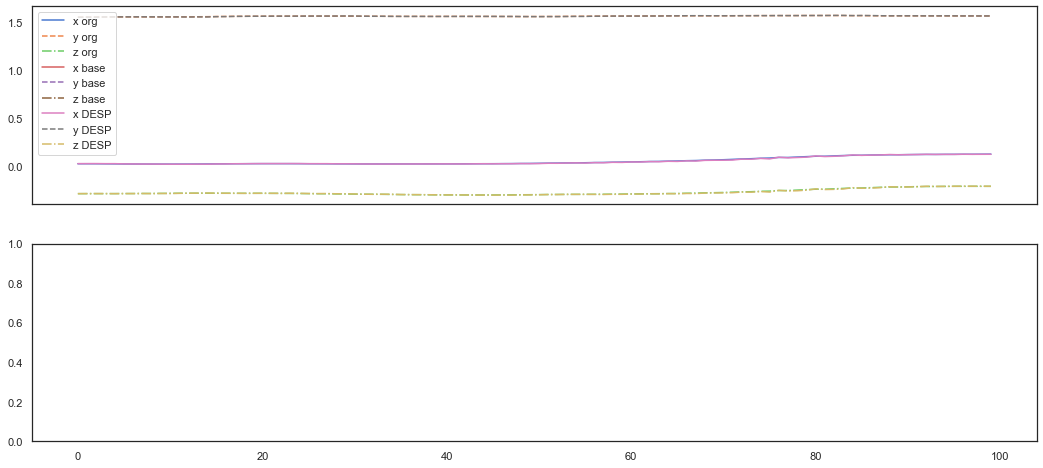

In [558]:
original_trace = Path_dataset01_data
base_pos = Path_results_dataset01_Baseline_pos + "/Traces"
desp_pos = Path_results_dataset01_DESP + "8_2209_v01/Traces"
gru_pos = Path_results_dataset01_GRU_pos + "7_2409_v01/Traces"
figures_path = Path_figures_dataset01

########### Original Trace
for csv in get_csv_files(original_trace, "5_full_cont"):
    print(csv)
    #ts = np.arange(0, 60 + cfg['dt'], cfg['dt'])
    df_org = pd.read_csv(csv)
    df_org = df_org[:19960]
    print(len(df_org))
    df_org.columns = ["x","y","z","qw","qx","qy","qz"]
    val1 = df_org[['x','y','z']].to_numpy()
    #ts = len(df)
    
    
    df_org = df_org[12500:12600]
    ts_org = np.arange(0, df_org.shape[0])

########### base prediction
for csv in get_csv_files(base_pos, "5_full_cont"):
    print(csv)
    #ts = np.arange(0, 60 + cfg['dt'], cfg['dt'])
    base = pd.read_csv(csv)
    print(len(base))
    base = base[:19960]
    #ts = len(df)
    
    base.columns = cfg['pos_coords_pred']  + cfg['pos_coords_true']
    val3 = desp[['x_pred','y_pred','z_pred']].to_numpy()
    base = pd.array([pos1 + pos2 for pos1 , pos2 in zip(val3, val1)])
    base = pd.DataFrame(desp)
    base.columns = cfg['pos_coords_pred']
    
    base = base[12500:12600]
    ts_base = np.arange(0, base.shape[0])
    print(base)
    
########### desp prediction
for csv in get_csv_files(desp_pos, "5_full_cont*pos"):
    print(csv)
    #ts = np.arange(0, 60 + cfg['dt'], cfg['dt'])
    desp = pd.read_csv(csv)
    desp = desp[:19960]
    print(len(desp))
    #ts = len(df)
    
    desp.columns = cfg['pos_coords_pred']  + cfg['pos_coords_true']
    val2 = desp[['x_pred','y_pred','z_pred']].to_numpy()
    desp = pd.array([pos1 + pos2 for pos1,pos2 in zip(val2, val1)])
    desp = pd.DataFrame(desp)
    desp.columns = cfg['pos_coords_pred']

    desp = desp[12500:12600]
    ts_desp = np.arange(0, desp.shape[0])
    print(desp)
    
    #print(df)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 8), sharex=True)
     
# Plot orignal
ax1.plot(ts_org, df_org['x'], label='x org')
ax1.plot(ts_org, df_org['y'], label='y org', linestyle='--')
ax1.plot(ts_org, df_org['z'], label='z org', linestyle='-.')

ax1.plot(ts_base, base['x_pred'], label='x base')
ax1.plot(ts_base, base['y_pred'], label='y base', linestyle='--')
ax1.plot(ts_base, base['z_pred'], label='z base', linestyle='-.')

ax1.plot(ts_desp, desp['x_pred'], label='x DESP')
ax1.plot(ts_desp, desp['y_pred'], label='y DESP', linestyle='--')
ax1.plot(ts_desp, desp['z_pred'], label='z DESP', linestyle='-.')

ax1.legend(loc='upper left')

dest = os.path.join(figures_path, "Prediction_pos.pdf")
fig.savefig(dest)
logging.info("Plotting trace {} and saving to file {}".format(csv, dest))

In [538]:

########### gru prediction
for csv in get_csv_files(gru_pos, "5_full_cont*pos*abs"):
    print(csv)
    #ts = np.arange(0, 60 + cfg['dt'], cfg['dt'])
    gru = pd.read_csv(csv)
    gru = gru[:19960]
    print(len(gru))
    #ts = len(df)
    ts_gru = np.arange(0, gru.shape[0])
    gru.columns = cfg['pos_coords_pred']  + cfg['pos_coords_true']


C:/Users/weikert1/Documents/Thesis/Project_V07_24092021/Results/01_Dataset/GRU_pos/7_2409_v01/Traces\5_full_continious_result_pos_abs.csv
19960


# ##############################################################
# Models
# ##############################################################


# GRU quat

In [266]:
###################################################
# Provide Model ID
model_ID = cfg['6_1_model_ID'] 
###################################################

# Load Traces
Path_results_dataset01_GRU_quat_model_id_traces =  Path_results_dataset01_GRU_quat + "/" + model_ID + "/Traces/" 

# Load Angular Distances
Path_results_dataset01_GRU_quat_model_id_evaluation =  Path_results_dataset01_GRU_quat + "/" + model_ID + "/Evaluation/" 

# Load Path Figure Traces
Path_figures_dataset01_GRU_quat_model_id_traces =  Path_figures_dataset01_GRU_quat + "/" + model_ID + "/Traces/" 

# Load Path Figure Distribution  
Path_figures_dataset01_GRU_quat_model_id_distribution =  Path_figures_dataset01_GRU_quat + "/" + model_ID + "/Distribution/" 

# Load Path Figure Error  
Path_figures_dataset01_GRU_quat_model_id_error =  Path_figures_dataset01_GRU_quat + "/" + model_ID + "/Error/" 

In [269]:
###########################
#Dataset 01
###########################

# Plot euler traces for dataset 01
#plot_quat_traces_joint(Path_results_dataset01_GRU_quat_model_id_traces,
#                        Path_figures_dataset01_GRU_quat_model_id_traces)

# Plot euler error for dataset 01
plot_error(Path_results_dataset01_GRU_quat_model_id_traces,
               Path_figures_dataset01_GRU_quat_model_id_error)

# Plot euler boxplot for dataset 01
#plot_boxplot(Path_results_dataset01_GRU_quat_model_id_evaluation,
#             Path_figures_dataset01_GRU_quat_model_id_distribution)

Done with errors


<Figure size 1296x576 with 0 Axes>

<Figure size 1296x576 with 0 Axes>

<Figure size 1296x576 with 0 Axes>

<Figure size 1296x576 with 0 Axes>

<Figure size 1296x576 with 0 Axes>

'C:/Users/weikert1/Documents/Thesis/Project_V07_24092021/Figures/01_Dataset/GRU_quat//7_2409_v01/Error/'

# GRU pos

In [16]:
###################################################
# Provide Model ID
model_ID = cfg['7_1_model_ID'] 
###################################################

# Load Traces
Path_results_dataset01_GRU_pos_model_id_traces =  Path_results_dataset01_GRU_pos + "/" + model_ID + "/Traces/" 

# Load Angular Distances
Path_results_dataset01_GRU_pos_model_id_evaluation =  Path_results_dataset01_GRU_pos + "/" + model_ID + "/Evaluation/" 

# Load Path Figure Traces
Path_figures_dataset01_GRU_pos_model_id_traces =  Path_figures_dataset01_GRU_pos + "/" + model_ID + "/Traces/" 

# Load Path Figure Distribution  
Path_figures_dataset01_GRU_pos_model_id_distribution =  Path_figures_dataset01_GRU_pos + "/" + model_ID + "/Distribution/" 

# Load Path Figure Error  
Path_figures_dataset01_GRU_pos_model_id_error =  Path_figures_dataset01_GRU_pos + "/" + model_ID + "/Error/"

In [273]:
###########################
#Dataset 01
###########################

# Plot euler traces for dataset 01
#plot_position_traces_joint(Path_results_dataset01_GRU_pos_model_id_traces,
#                        Path_figures_dataset01_GRU_pos_model_id_traces)

# Plot euler error for dataset 01
#plot_boxplot_euc(Path_results_dataset01_GRU_pos_model_id_evaluation,
#               Path_figures_dataset01_GRU_pos_model_id_distribution)

# Plot euler boxplot for dataset 01
plot_error(Path_results_dataset01_GRU_pos_model_id_evaluation, 
           Path_figures_dataset01_GRU_pos_model_id_error)

Done with errors


<Figure size 1296x576 with 0 Axes>

<Figure size 1296x576 with 0 Axes>

<Figure size 1296x576 with 0 Axes>

<Figure size 1296x576 with 0 Axes>

<Figure size 1296x576 with 0 Axes>

<Figure size 1296x576 with 0 Axes>

<Figure size 1296x576 with 0 Axes>

<Figure size 1296x576 with 0 Axes>

<Figure size 1296x576 with 0 Axes>

<Figure size 1296x576 with 0 Axes>

In [29]:
Path_results_dataset01_GRU_pos_model_id_traces

'C:/Users/weikert1/Documents/Thesis/Project_V07_24092021/Results/01_Dataset/GRU_pos//7_2409_v01/Traces/'

# Baseline quat

In [4]:
###################################################
# Provide Model ID
model_ID = "Baseline_quat"
###################################################

# Load Traces
Path_results_dataset01_Baseline_quat_model_id_traces =  Path_results_dataset01_Baseline_quat + "/" + "/Traces/" 

# Load Angular Distances
Path_results_dataset01_Baseline_quat_model_id_evaluation =  Path_results_dataset01_Baseline_quat + "/" + "/Evaluation/" 

# Load Path Figure Traces
Path_figures_dataset01_Baseline_quat_model_id_traces =  Path_figures_dataset01_Baseline_quat + "/" + "/Traces/" 

# Load Path Figure Distribution  
Path_figures_dataset01_Baseline_quat_model_id_distribution =  Path_figures_dataset01_Baseline_quat + "/" + "/Distribution/" 

# Load Path Figure Error  
Path_figures_dataset01_Baseline_quat_model_id_error =  Path_figures_dataset01_Baseline_quat + "/" + "/Error/" 

In [12]:
###########################
#Dataset 01
###########################

# Plot euler traces for dataset 01
plot_quat_traces_joint(Path_results_dataset01_Baseline_quat_model_id_traces,
                        Path_figures_dataset01_Baseline_quat_model_id_traces)

# Plot euler error for dataset 01
plot_error(Path_results_dataset01_Baseline_quat_model_id_traces,
               Path_figures_dataset01_Baseline_quat_model_id_error)

# Plot euler boxplot for dataset 01
plot_boxplot(Path_results_dataset01_Baseline_quat_model_id_evaluation,
             Path_figures_dataset01_Baseline_quat_model_id_distribution)

Done with traces
Done with errors


C:\Users\weikert1\anaconda3\envs\thesis_gpu\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\weikert1\anaconda3\envs\thesis_gpu\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\weikert1\anaconda3\envs\thesis_gpu\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level func

Done with boxplots


C:\Users\weikert1\anaconda3\envs\thesis_gpu\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 1296x576 with 0 Axes>

<Figure size 1296x576 with 0 Axes>

<Figure size 1296x576 with 0 Axes>

<Figure size 1296x576 with 0 Axes>

<Figure size 1296x576 with 0 Axes>

<Figure size 1296x576 with 0 Axes>

<Figure size 1296x576 with 0 Axes>

<Figure size 1296x576 with 0 Axes>

<Figure size 1296x576 with 0 Axes>

<Figure size 1296x576 with 0 Axes>

<Figure size 1296x576 with 0 Axes>

<Figure size 1296x576 with 0 Axes>

<Figure size 1296x576 with 0 Axes>

<Figure size 1296x576 with 0 Axes>

<Figure size 1296x576 with 0 Axes>

<Figure size 1296x576 with 0 Axes>

In [73]:
# Plot orientation traces for dataset 01 - LSTM
plot_orientation_traces_joint(dataset01_path_result_LSTM,dataset01_figures_path_LSTM)

Plotted all orientation for trace C:/Users/weikert1/Documents/Thesis/Project_V05_15072021/Results/01_Dataset/LSTM/Traces\1_test_result_rot_lstm.csv and saving to file C:/Users/weikert1/Documents/Thesis/Project_V05_15072021/Figures/01_Dataset/LSTM\1_test_result_rot_lstm_joint_roll.pdf
-------
Plotted all orientation for trace C:/Users/weikert1/Documents/Thesis/Project_V05_15072021/Results/01_Dataset/LSTM/Traces\2_test_result_rot_lstm.csv and saving to file C:/Users/weikert1/Documents/Thesis/Project_V05_15072021/Figures/01_Dataset/LSTM\2_test_result_rot_lstm_joint_roll.pdf
-------
Plotted all orientation for trace C:/Users/weikert1/Documents/Thesis/Project_V05_15072021/Results/01_Dataset/LSTM/Traces\3_test_result_rot_lstm.csv and saving to file C:/Users/weikert1/Documents/Thesis/Project_V05_15072021/Figures/01_Dataset/LSTM\3_test_result_rot_lstm_joint_roll.pdf
-------
Plotted all orientation for trace C:/Users/weikert1/Documents/Thesis/Project_V05_15072021/Results/01_Dataset/LSTM/Traces\

<Figure size 1296x576 with 0 Axes>

<Figure size 1296x576 with 0 Axes>

<Figure size 1296x576 with 0 Axes>

<Figure size 1296x576 with 0 Axes>

In [75]:
# Plot orientation traces for dataset 01 - GRU
plot_orientation_traces_joint(dataset01_path_result_GRU,dataset01_figures_path_GRU)

In [ ]:
# Plot position traces for dataset 02
plot_traces_joint(dataset02_path_result,dataset02_figures_path)

In [ ]:
# Plot orientation traces for dataset 02
plot_orientation_traces_joint(dataset02_path_result,dataset02_figures_path)

In [76]:
# Plot euler traces for dataset 02
plot_euler_traces_joint(dataset02_path_result_LSTM_Euler,dataset02_figures_path_LSTM_Euler)

Plotted all orientation for trace C:/Users/weikert1/Documents/Thesis/Project_V05_15072021/Results/02_Dataset/LSTM_euler//Traces\10_interpolated_test_result_euler_lstm.csv and saving to file C:/Users/weikert1/Documents/Thesis/Project_V05_15072021/Figures/02_Dataset/LSTM_euler\10_interpolated_test_result_euler_lstm_joint_roll.pdf
-------
Plotted all orientation for trace C:/Users/weikert1/Documents/Thesis/Project_V05_15072021/Results/02_Dataset/LSTM_euler//Traces\11_interpolated_test_result_euler_lstm.csv and saving to file C:/Users/weikert1/Documents/Thesis/Project_V05_15072021/Figures/02_Dataset/LSTM_euler\11_interpolated_test_result_euler_lstm_joint_roll.pdf
-------
Plotted all orientation for trace C:/Users/weikert1/Documents/Thesis/Project_V05_15072021/Results/02_Dataset/LSTM_euler//Traces\12_interpolated_test_result_euler_lstm.csv and saving to file C:/Users/weikert1/Documents/Thesis/Project_V05_15072021/Figures/02_Dataset/LSTM_euler\12_interpolated_test_result_euler_lstm_joint_rol

<Figure size 1296x576 with 0 Axes>

<Figure size 1296x576 with 0 Axes>

<Figure size 1296x576 with 0 Axes>

<Figure size 1296x576 with 0 Axes>

<Figure size 1296x576 with 0 Axes>

<Figure size 1296x576 with 0 Axes>

<Figure size 1296x576 with 0 Axes>

<Figure size 1296x576 with 0 Axes>

<Figure size 1296x576 with 0 Axes>

<Figure size 1296x576 with 0 Axes>

<Figure size 1296x576 with 0 Axes>

<Figure size 1296x576 with 0 Axes>

<Figure size 1296x576 with 0 Axes>

<Figure size 1296x576 with 0 Axes>

# ##############################################################
# Error


In [ ]:
def plot_error_position(dataset_path_result, figures_path): 
     

    list_datasets = get_csv_files(dataset_path_result, "interpolated*test*pos")
    
    for single_dataset in list_datasets:
        df = pd.read_csv(single_dataset)
        ts = np.arange(0, df.shape[0])

        plt.figure(figsize=(18,8))
        
        #print(trace_id)
        trace_id = os.path.splitext(os.path.basename(single_dataset))[0]
                
        # Plot yaw error 
        plt.plot(ts,np.abs(df.loc[:, 'x_pred'] - df.loc[:, 'x_true'])%360, label='x_preds-x_true', linestyle='-.')
        plt.legend(loc='upper left')
        dest = os.path.join(figures_path, "{}_error_x.pdf".format(trace_id))
        plt.savefig(dest)
        plt.clf()
        
        # Plot pitch error
        plt.plot(ts,np.abs(df.loc[:, 'y_pred'] - df.loc[:, 'y_true']), label='y_preds-y_true', linestyle='-.')
        plt.legend(loc='upper left')
        dest = os.path.join(figures_path, "{}_error_y.pdf".format(trace_id))
        plt.savefig(dest)
        plt.clf()
        
        # Plot roll error
        plt.plot(ts,np.abs(df.loc[:, 'z_pred'] - df.loc[:, 'z_true']), label='z_preds-z_true', linestyle='-.')
        plt.legend(loc='upper left')
        dest = os.path.join(figures_path, "{}_error_z.pdf".format(trace_id))
        plt.savefig(dest)
        plt.clf()
        
        print("Plotted all position errors for trace {} and saving to file {}".format(single_dataset, dest))
        print("-------")
        

In [ ]:
# Plot POSITION error for dataset 01
plot_error_position(dataset01_path_result,dataset01_figures_path)

In [30]:
# Plot ORIENTATION error for dataset 01 - LSTM_euler
plot_error_orientation(dataset01_path_result_LSTM_Euler,dataset01_figures_path_LSTM_Euler)

C:/Users/weikert1/Documents/Thesis/Project_V05_15072021/Results/01_Dataset/LSTM_euler\1_test_result_euler_lstm.csv
Plotted all orientation errors for trace C:/Users/weikert1/Documents/Thesis/Project_V05_15072021/Results/01_Dataset/LSTM_euler\1_test_result_euler_lstm.csv and saving to file C:/Users/weikert1/Documents/Thesis/Project_V05_15072021/Figures/01_Dataset/LSTM_euler\1_test_result_euler_lstm_error_roll.pdf
-------


KeyError: 'pitch_pred'

<Figure size 1296x576 with 0 Axes>

In [47]:
# Plot ORIENTATION error for dataset 02 - LSTM_euler
plot_error_orientation(dataset02_path_result_LSTM_Euler,dataset02_figures_path_LSTM_Euler)

KeyError: 'pitch_pred'

In [ ]:
# Plot ORIENTATION error for dataset 02
plot_error_orientation(dataset02_path_result,dataset02_figures_path)

In [66]:
# Plot ORIENTATION boxplot and density for dataset 01 - LSTM euler
plot_boxplot_euler(dataset01_path_result_LSTM_Euler,dataset01_figures_path_LSTM_Euler)

1_test_result_euler_lstm_ang_dists


C:\Users\weikert1\anaconda3\envs\thesis_gpu\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


2_test_result_euler_lstm_ang_dists


C:\Users\weikert1\anaconda3\envs\thesis_gpu\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


3_test_result_euler_lstm_ang_dists


C:\Users\weikert1\anaconda3\envs\thesis_gpu\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


5_test_result_euler_lstm_ang_dists


C:\Users\weikert1\anaconda3\envs\thesis_gpu\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 1296x576 with 0 Axes>

<Figure size 1296x576 with 0 Axes>

<Figure size 1296x576 with 0 Axes>

<Figure size 1296x576 with 0 Axes>

In [ ]:
# Plot ORIENTATION boxplot and density for dataset 01
plot_boxplot(dataset01_path_result,dataset01_figures_path)